In [953]:
import seaborn as sns
import pandas as pd
import os
from pathlib import Path
from matplotlib import pyplot as plt
import itertools

In [954]:
resources = Path(os.path.abspath('../resources'))
cassanda_path = Path(os.path.abspath('../resources/cassanda'))
hive_path = Path(os.path.abspath('../resources/hive'))

print(resources)
print(cassanda_path)
print(hive_path)

/Users/Jumma/github_repo/github_api_extractor/resources
/Users/Jumma/github_repo/github_api_extractor/resources/cassanda
/Users/Jumma/github_repo/github_api_extractor/resources/hive


In [955]:
hive_2015 = pd.read_csv(hive_path/'Output_hive_2015Aug05_TestSmellDetection_1675797361331.csv')
hive_2016 = pd.read_csv(hive_path/'Output_hive_2016Jul06_TestSmellDetection_1675796997456.csv')
hive_2017 = pd.read_csv(hive_path/'Output_hive_2017Apr05_TestSmellDetection_1675796760046.csv')
hive_2018 = pd.read_csv(hive_path/'Output_hive_2018Dec07_TestSmellDetection_1675796163621.csv')
hive_2019 = pd.read_csv(hive_path/'Output_hive_2019Nov06_TestSmellDetection_1675795961152.csv')
hive_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   App                          15 non-null     object 
 1   TestClass                    15 non-null     object 
 2   TestFilePath                 15 non-null     object 
 3   ProductionFilePath           0 non-null      float64
 4   RelativeTestFilePath         15 non-null     object 
 5   RelativeProductionFilePath   0 non-null      float64
 6   NumberOfMethods              15 non-null     int64  
 7   Assertion Roulette           15 non-null     int64  
 8   Conditional Test Logic       15 non-null     int64  
 9   Constructor Initialization   15 non-null     int64  
 10  Default Test                 15 non-null     int64  
 11  EmptyTest                    15 non-null     int64  
 12  Exception Catching Throwing  15 non-null     int64  
 13  General Fixture       

In [956]:
test_semantic_smell = ['Assertion Roulette','Conditional Test Logic','Duplicate Assert']
issue_in_test_step = ['Exception Catching Throwing', 'General Fixture', 'EmptyTest', 'Redundant Assertion', 'Unknown Test', 'Constructor Initialization']
code_related = ['Magic Number Test', 'Print Statement', 'IgnoredTest', 'Verbose Test']
dependencies = ['Mystery Guest', 'Resource Optimism']
test_execution = ['Sensitive Equality', 'Sleepy Test', 'Sensitive Equality']
hive_2015.head(5)

,App,TestClass,TestFilePath,ProductionFilePath,RelativeTestFilePath,RelativeProductionFilePath,NumberOfMethods,Assertion Roulette,Conditional Test Logic,Constructor Initialization,...,Verbose Test,Sleepy Test,Eager Test,Lazy Test,Duplicate Assert,Unknown Test,IgnoredTest,Resource Optimism,Magic Number Test,Dependent Test
0,hive,TestCloudComputeService.java,/Users/Jumma/github_repo/hive/testutils/ptest2...,NaN,ptest/execution/context/TestCloudComputeServic...,NaN,5,0,0,0,...,0,0,NaN,NaN,0,0,0,0,4,0
1,hive,TestTestParser.java,/Users/Jumma/github_repo/hive/testutils/ptest2...,NaN,ptest/execution/conf/TestTestParser.java,NaN,6,0,0,0,...,0,0,NaN,NaN,0,0,0,1,3,0
2,hive,TestTestConfiguration.java,/Users/Jumma/github_repo/hive/testutils/ptest2...,NaN,ptest/execution/conf/TestTestConfiguration.java,NaN,3,2,0,0,...,0,0,NaN,NaN,0,0,0,0,3,0
3,hive,TestQFileTestBatch.java,/Users/Jumma/github_repo/hive/testutils/ptest2...,NaN,ptest/execution/conf/TestQFileTestBatch.java,NaN,4,2,0,0,...,0,0,NaN,NaN,0,0,0,0,3,0
4,hive,TestScripts.java,/Users/Jumma/github_repo/hive/testutils/ptest2...,NaN,ptest/execution/TestScripts.java,NaN,10,0,0,0,...,0,0,NaN,NaN,0,6,0,0,6,0


In [957]:
def clean_data(df_input: pd, wanted_test_smell: list, classification_test_smell: str, year: int):
    result_df = pd.DataFrame(columns=['Test_Smell_Classification_Type', 'Test_Smell', 'Number_Of_Test_Class','Total_Of_Test_Class', 'List_Of_Test_Class',  'Number_Of_Test_Smell', 'Total_Of_Test_Smell', 'Year'])
    df_input = df_input.dropna(axis='columns')
    test_smell_df = df_input.loc[:, 'Assertion Roulette':'Dependent Test']
    test_smell_df['TestClass'] = df_input['TestClass']

    for column in wanted_test_smell:
        test_smell = pd.DataFrame({'Test_Smell': [column]})
        temp_test_class = test_smell_df.loc[test_smell_df[column] > 0, 'TestClass'].tolist()
        list_of_test_class = pd.DataFrame({'List_Of_Test_Class': [temp_test_class]})
        number_of_test_class = pd.DataFrame({'Number_Of_Test_Class': [len(temp_test_class)]})
        Number_Of_Test_Smell = pd.DataFrame({'Number_Of_Test_Smell': [test_smell_df[column].sum()]})
        temp_list = pd.concat([test_smell, list_of_test_class, number_of_test_class, Number_Of_Test_Smell], axis=1)
        result_df = pd.concat([result_df,temp_list])

    result_df['Total_Of_Test_Class'] = len(list(dict.fromkeys(list(itertools.chain.from_iterable(result_df['List_Of_Test_Class'].tolist())))))
    result_df['Test_Smell_Classification_Type'] = classification_test_smell
    result_df['Year'] = year
    result_df['Total_Of_Test_Smell'] = result_df['Number_Of_Test_Smell'].sum()

    return result_df

In [958]:
#2015
test_semantic_smell_2015 = clean_data(hive_2015, test_semantic_smell, 'test_semantic_smell', 2015)
issue_in_test_step_2015 = clean_data(hive_2015, issue_in_test_step, 'issue_in_test_step', 2015)
code_related_2015 = clean_data(hive_2015, code_related, 'code_related', 2015)
dependencies_2015 = clean_data(hive_2015, dependencies, 'dependencies', 2015)
test_execution_2015 = clean_data(hive_2015, test_execution, 'test_execution', 2015)
classification_2015 = [test_semantic_smell_2015, issue_in_test_step_2015, code_related_2015, dependencies_2015, test_execution_2015]
classification_2015 = pd.concat(classification_2015).reset_index(drop=True)
#2016
test_semantic_smell_2016 = clean_data(hive_2016, test_semantic_smell, 'test_semantic_smell', 2016)
issue_in_test_step_2016 = clean_data(hive_2016, issue_in_test_step, 'issue_in_test_step', 2016)
code_related_2016 = clean_data(hive_2016, code_related, 'code_related', 2016)
dependencies_2016 = clean_data(hive_2016, dependencies, 'dependencies', 2016)
test_execution_2016 = clean_data(hive_2016, test_execution, 'test_execution', 2016)
classification_2016 = [test_semantic_smell_2016, issue_in_test_step_2016, code_related_2016, dependencies_2016, test_execution_2016]
classification_2016 = pd.concat(classification_2016).reset_index(drop=True)
#2017
test_semantic_smell_2017 = clean_data(hive_2017, test_semantic_smell, 'test_semantic_smell', 2017)
issue_in_test_step_2017 = clean_data(hive_2017, issue_in_test_step, 'issue_in_test_step', 2017)
code_related_2017 = clean_data(hive_2017, code_related, 'code_related', 2017)
dependencies_2017 = clean_data(hive_2017, dependencies, 'dependencies', 2017)
test_execution_2017 = clean_data(hive_2017, test_execution, 'test_execution', 2017)
classification_2017 = [test_semantic_smell_2017, issue_in_test_step_2017, code_related_2017, dependencies_2017, test_execution_2017]
classification_2017 = pd.concat(classification_2017).reset_index(drop=True)
#2018
test_semantic_smell_2018 = clean_data(hive_2018, test_semantic_smell, 'test_semantic_smell', 2018)
issue_in_test_step_2018 = clean_data(hive_2018, issue_in_test_step, 'issue_in_test_step', 2018)
code_related_2018 = clean_data(hive_2018, code_related, 'code_related', 2018)
dependencies_2018 = clean_data(hive_2018, dependencies, 'dependencies', 2018)
test_execution_2018 = clean_data(hive_2018, test_execution, 'test_execution', 2018)
classification_2018 = [test_semantic_smell_2018, issue_in_test_step_2018, code_related_2018, dependencies_2018, test_execution_2018]
classification_2018 = pd.concat(classification_2018).reset_index(drop=True)
#2019
test_semantic_smell_2019 = clean_data(hive_2019, test_semantic_smell, 'test_semantic_smell', 2019)
issue_in_test_step_2019 = clean_data(hive_2019, issue_in_test_step, 'issue_in_test_step', 2019)
code_related_2019 = clean_data(hive_2019, code_related, 'code_related', 2019)
dependencies_2019 = clean_data(hive_2019, dependencies, 'dependencies', 2019)
test_execution_2019 = clean_data(hive_2019, test_execution, 'test_execution', 2019)
classification_2019 = [test_semantic_smell_2019, issue_in_test_step_2019, code_related_2019, dependencies_2019, test_execution_2019]
classification_2019 = pd.concat(classification_2019).reset_index(drop=True)

classification_all = [classification_2015, classification_2016, classification_2017, classification_2018, classification_2019]
classification_all = pd.concat(classification_all).reset_index(drop=True)

In [959]:
classification_all

,Test_Smell_Classification_Type,Test_Smell,Number_Of_Test_Class,Total_Of_Test_Class,List_Of_Test_Class,Number_Of_Test_Smell,Total_Of_Test_Smell,Year
0,test_semantic_smell,Assertion Roulette,8,9,"[TestTestConfiguration.java, TestQFileTestBatc...",20,29,2015
1,test_semantic_smell,Conditional Test Logic,2,9,"[TestReportParser.java, TestJIRAService.java]",3,29,2015
2,test_semantic_smell,Duplicate Assert,3,9,"[TestLocalCommand.java, TestJIRAService.java, ...",6,29,2015
3,issue_in_test_step,Exception Catching Throwing,15,15,"[TestCloudComputeService.java, TestTestParser....",44,74,2015
4,issue_in_test_step,General Fixture,5,15,"[TestCloudComputeService.java, TestTestParser....",22,74,2015
...,...,...,...,...,...,...,...,...
85,dependencies,Mystery Guest,5,8,"[TestContext.java, TestTestConfiguration.java,...",14,24,2019
86,dependencies,Resource Optimism,6,8,"[TestTestParser.java, TestReportParser.java, T...",10,24,2019
87,test_execution,Sensitive Equality,3,4,"[TestTestConfiguration.java, TestHostExecutor....",8,17,2019
88,test_execution,Sleepy Test,1,4,[TestLocalCommand.java],1,17,2019


In [960]:
def total_test_smell(dataframe : pd.DataFrame, year):
    dataframe = dataframe.dropna(axis='columns')
    df = dataframe.loc[:, 'Assertion Roulette':'Dependent Test']
    total =  df.sum()
    total = pd.Series(total)
    frame = {'Amount': total, 'Year': year}
    result = pd.DataFrame(frame)
    result.reset_index(inplace=True)
    result = result.rename(columns={'index': 'Test_Smell_Type'}, errors='raise')
    result['Test_Smell_Total'] = result['Amount'].sum()
    return result

In [961]:
def total_test_method(dataframe : pd.DataFrame, year):
    dataframe = dataframe.dropna(axis='columns')
    df = dataframe.loc[:, 'NumberOfMethods':'Dependent Test']
    total =  df.sum()
    total = pd.Series(total)
    frame = {'Amount': total, 'Year': year}
    result = pd.DataFrame(frame)
    result.reset_index(inplace=True)
    result = result.rename(columns={'index': 'Test_Smell_Type'}, errors='raise')
    return result

In [962]:
# testsmell2015 = total_test_method(hive_2015, 2015)
# testsmell2016 = total_test_method(hive_2016, 2016)
# testsmell2017 = total_test_method(hive_2017, 2017)
# testsmell2018 = total_test_method(hive_2018, 2018)
# testsmell2019 = total_test_method(hive_2019, 2019)
# all = [testsmell2015,testsmell2016,testsmell2017,testsmell2018,testsmell2019]
# df = pd.concat(all, axis=0)
# df = df.loc[df['Test_Smell_Type'] == 'NumberOfMethods']
# df = df.rename(columns={'Test_Smell_Type': 'Test_Method', 'Amount': 'Test_Method_Total'})
# df = df.drop(['Test_Method'], axis=1)
# df
# sns.barplot(x='Year', y='Amount', hue='Test_Smell_Type', data=df)

In [963]:
# total_hive2015 = total_test_smell(hive_2015, 2015)
# total_hive2016 = total_test_smell(hive_2016, 2016)
# total_hive2017 = total_test_smell(hive_2017, 2017)
# total_hive2018 = total_test_smell(hive_2018, 2018)
# total_hive2019 = total_test_smell(hive_2019, 2019)
# all_list_hive = [total_hive2015,total_hive2016,total_hive2017,total_hive2018,total_hive2019]
# all_list_hive_total = pd.concat(all_list_hive, axis=0)
# all_list_hive_total = all_list_hive_total.reset_index(drop=True)
# all_list_hive_total = all_list_hive_total.merge(df, on='Year', how='left')
# all_list_hive_total
# all_list_hive_total = all_list_hive_total.rename({0: '2015',1: '2016',2: '2017',3: '2018',4: '2019'}, axis='columns', errors='raise')
# all_list_hive_total


In [964]:
star_each_year = pd.DataFrame({
    'Year':[2015, 2016, 2017, 2018, 2019],
    'Star':[570, 870, 1200, 2130, 2760]
})
star_each_year
classification_all = classification_all.merge(star_each_year, on='Year', how='left')
classification_all_drop_zero_smell = classification_all[classification_all['Number_Of_Test_Smell'] != 0]

In [965]:
def add_density(df:pd):
    df['Density_TestSmellTotal_Class'] = df['Total_Of_Test_Smell']/df['Total_Of_Test_Class']
    return df

In [966]:
classification_all_with_density = add_density(classification_all)
classification_all_with_density.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 0 to 89
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Test_Smell_Classification_Type  90 non-null     object 
 1   Test_Smell                      90 non-null     object 
 2   Number_Of_Test_Class            90 non-null     object 
 3   Total_Of_Test_Class             90 non-null     int64  
 4   List_Of_Test_Class              90 non-null     object 
 5   Number_Of_Test_Smell            90 non-null     object 
 6   Total_Of_Test_Smell             90 non-null     int64  
 7   Year                            90 non-null     int64  
 8   Star                            90 non-null     int64  
 9   Density_TestSmellTotal_Class    90 non-null     float64
dtypes: float64(1), int64(4), object(5)
memory usage: 7.7+ KB


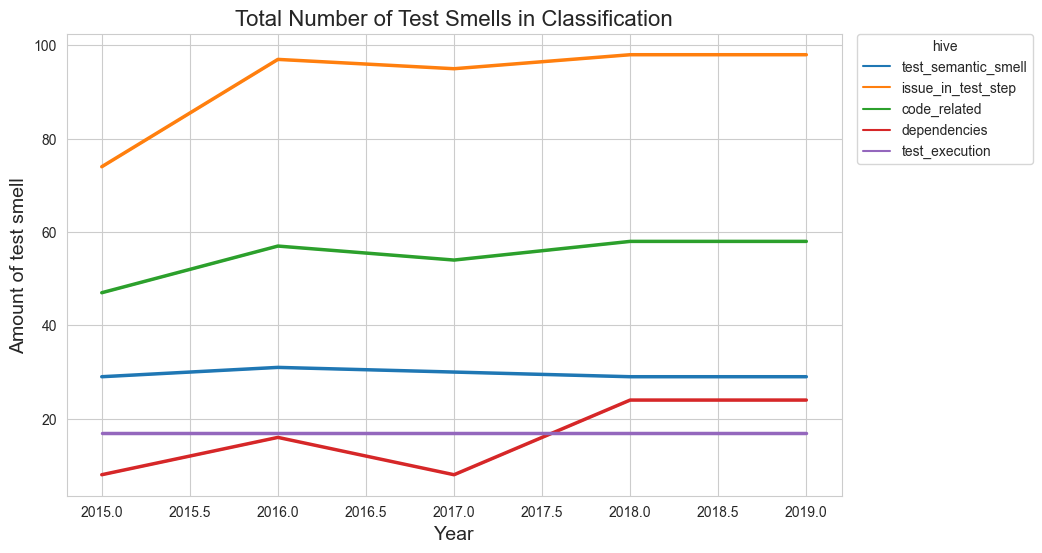

In [967]:
# create line chart, test smells
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.lineplot(data=classification_all.set_index('Year'),x='Year', y='Total_Of_Test_Smell',hue='Test_Smell_Classification_Type', linewidth=2.5, dashes=False)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='hive')
plt.title('Total Number of Test Smells in Classification', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Amount of test smell', fontsize=14)
plt.show()

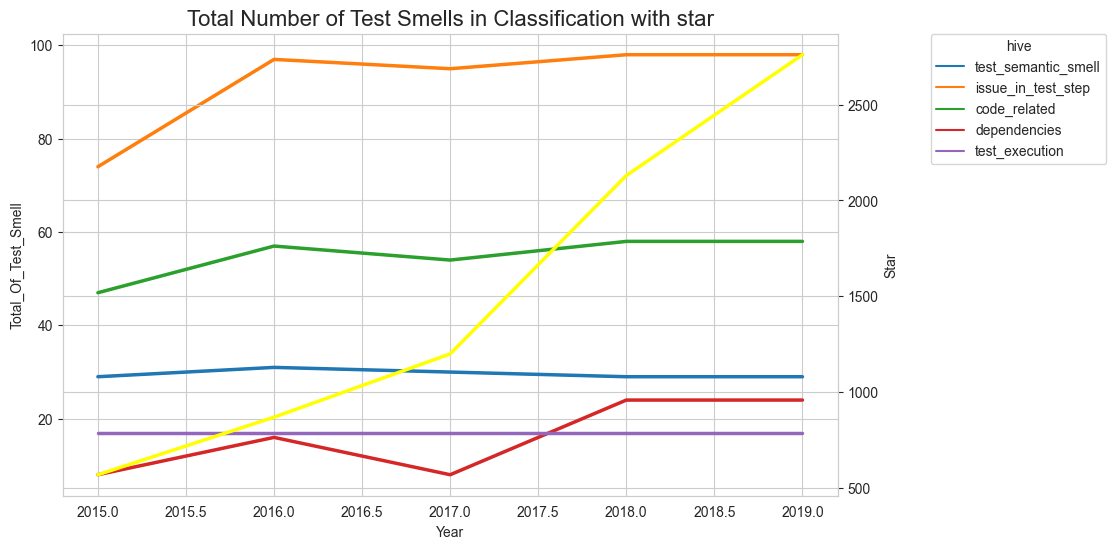

In [968]:
# create line chart, test smells with star
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
ax1 = sns.lineplot(data=classification_all.set_index('Year'),x='Year', y='Total_Of_Test_Smell',hue='Test_Smell_Classification_Type', linewidth=2.5, dashes=False)
plt.legend(bbox_to_anchor=(1.12, 1), loc='upper left', borderaxespad=0, title='hive')
ax2 = ax1.twinx()
sns.lineplot(data=classification_all.set_index('Year'),linewidth=2.5 ,x='Year', y='Star', color='yellow')
plt.title('Total Number of Test Smells in Classification with star', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.show()

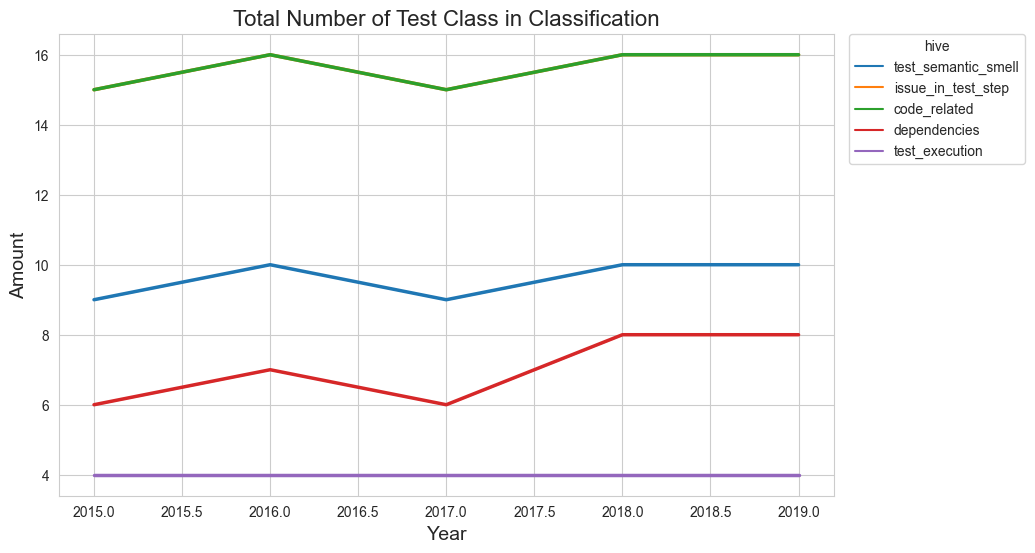

In [969]:
# create line chart, test class
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.lineplot(data=classification_all.set_index('Year'), x='Year', y='Total_Of_Test_Class', hue='Test_Smell_Classification_Type', linewidth=2.5, dashes=False,)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='hive')
plt.title('Total Number of Test Class in Classification', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.show()

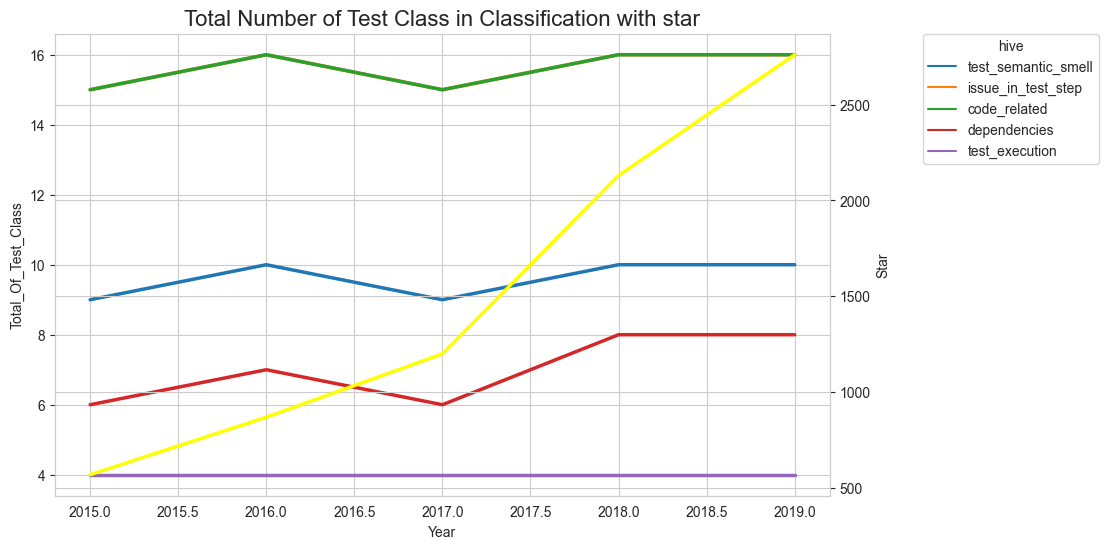

In [970]:
# create line chart, test class with star
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
ax1 = sns.lineplot(data=classification_all.set_index('Year'), x='Year', y='Total_Of_Test_Class', hue='Test_Smell_Classification_Type', linewidth=2.5, dashes=False,)
plt.legend(bbox_to_anchor=(1.12, 1), loc='upper left', borderaxespad=0, title='hive')
ax2 = ax1.twinx()
sns.lineplot(data=classification_all.set_index('Year'),linewidth=2.5 ,x='Year', y='Star', color='yellow')
plt.title('Total Number of Test Class in Classification with star', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.show()

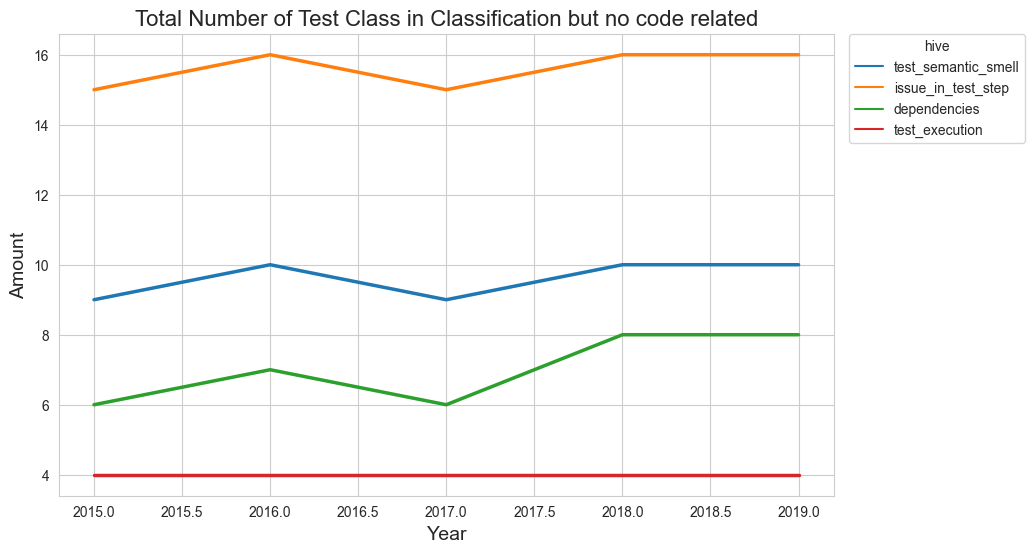

In [971]:
# create line chart, test smells with star
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.lineplot(data=classification_all[classification_all['Test_Smell_Classification_Type'] != 'code_related'].set_index('Year'), x='Year', y='Total_Of_Test_Class', hue='Test_Smell_Classification_Type', linewidth=2.5, dashes=False,)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='hive')
plt.title('Total Number of Test Class in Classification but no code related', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.show()

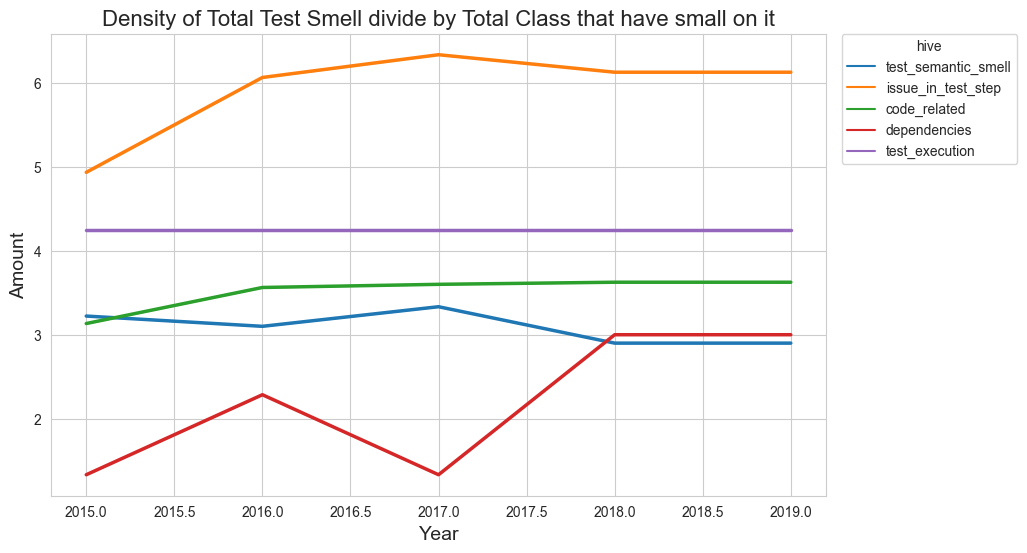

In [972]:
# create line chart, density smells/class
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.lineplot(data=classification_all_with_density.set_index('Year'),x='Year', y='Density_TestSmellTotal_Class', hue='Test_Smell_Classification_Type', linewidth=2.5, dashes=False)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='hive')
plt.title('Density of Total Test Smell divide by Total Class that have small on it', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.show()

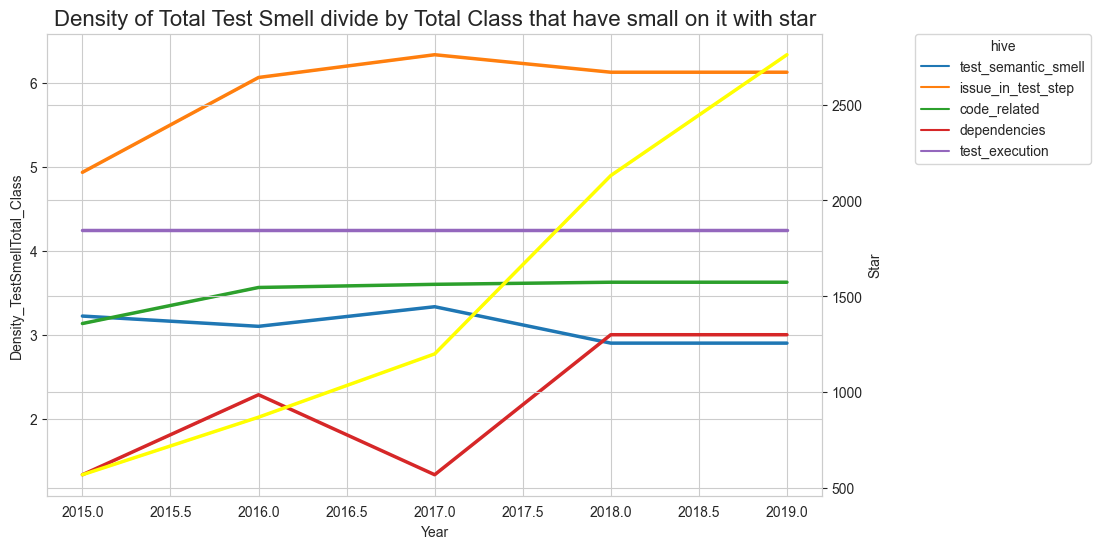

In [973]:
# create line chart, density smells/class with star
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
ax1 = sns.lineplot(data=classification_all_with_density.set_index('Year'),x='Year', y='Density_TestSmellTotal_Class', hue='Test_Smell_Classification_Type', linewidth=2.5, dashes=False)
plt.legend(bbox_to_anchor=(1.12, 1), loc='upper left', borderaxespad=0, title='hive')
ax2 = ax1.twinx()
sns.lineplot(data=classification_all.set_index('Year'),linewidth=2.5 ,x='Year', y='Star', color='yellow')
plt.title('Density of Total Test Smell divide by Total Class that have small on it with star', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.show()

In [974]:
classification_all_pct_ch = classification_all
classification_all_pct_ch.info()
#Growth rate test class change in year
classification_all_pct_year_class = classification_all_pct_ch.sort_values(['Test_Smell_Classification_Type','Year']).reset_index(drop=True)
classification_all_pct_year_class['pct'] = classification_all_pct_year_class.groupby('Test_Smell_Classification_Type', sort=False)['Total_Of_Test_Class'].apply(lambda x: x.pct_change()*100).to_numpy()
classification_all_pct_year_class = classification_all_pct_year_class.loc[:,['Test_Smell_Classification_Type','Year','Total_Of_Test_Class','pct']]
classification_all_pct_year_class

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 0 to 89
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Test_Smell_Classification_Type  90 non-null     object 
 1   Test_Smell                      90 non-null     object 
 2   Number_Of_Test_Class            90 non-null     object 
 3   Total_Of_Test_Class             90 non-null     int64  
 4   List_Of_Test_Class              90 non-null     object 
 5   Number_Of_Test_Smell            90 non-null     object 
 6   Total_Of_Test_Smell             90 non-null     int64  
 7   Year                            90 non-null     int64  
 8   Star                            90 non-null     int64  
 9   Density_TestSmellTotal_Class    90 non-null     float64
dtypes: float64(1), int64(4), object(5)
memory usage: 7.7+ KB


,Test_Smell_Classification_Type,Year,Total_Of_Test_Class,pct
0,code_related,2015,15,NaN
1,code_related,2015,15,0.000000
2,code_related,2015,15,0.000000
3,code_related,2015,15,0.000000
4,code_related,2016,16,6.666667
...,...,...,...,...
85,test_semantic_smell,2018,10,0.000000
86,test_semantic_smell,2018,10,0.000000
87,test_semantic_smell,2019,10,0.000000
88,test_semantic_smell,2019,10,0.000000


In [975]:
#Growth rate test smell change in year
classification_all_pct_year_smell = classification_all_pct_ch.sort_values(['Test_Smell_Classification_Type','Year']).reset_index(drop=True)
classification_all_pct_year_smell['pct'] = classification_all_pct_year_smell.groupby('Test_Smell_Classification_Type', sort=False)['Total_Of_Test_Smell'].apply(lambda x: x.pct_change()*100).to_numpy()
classification_all_pct_year_smell = classification_all_pct_year_smell.loc[:,['Test_Smell_Classification_Type','Year','Total_Of_Test_Smell','pct']]
classification_all_pct_year_smell

,Test_Smell_Classification_Type,Year,Total_Of_Test_Smell,pct
0,code_related,2015,47,NaN
1,code_related,2015,47,0.000000
2,code_related,2015,47,0.000000
3,code_related,2015,47,0.000000
4,code_related,2016,57,21.276596
...,...,...,...,...
85,test_semantic_smell,2018,29,0.000000
86,test_semantic_smell,2018,29,0.000000
87,test_semantic_smell,2019,29,0.000000
88,test_semantic_smell,2019,29,0.000000


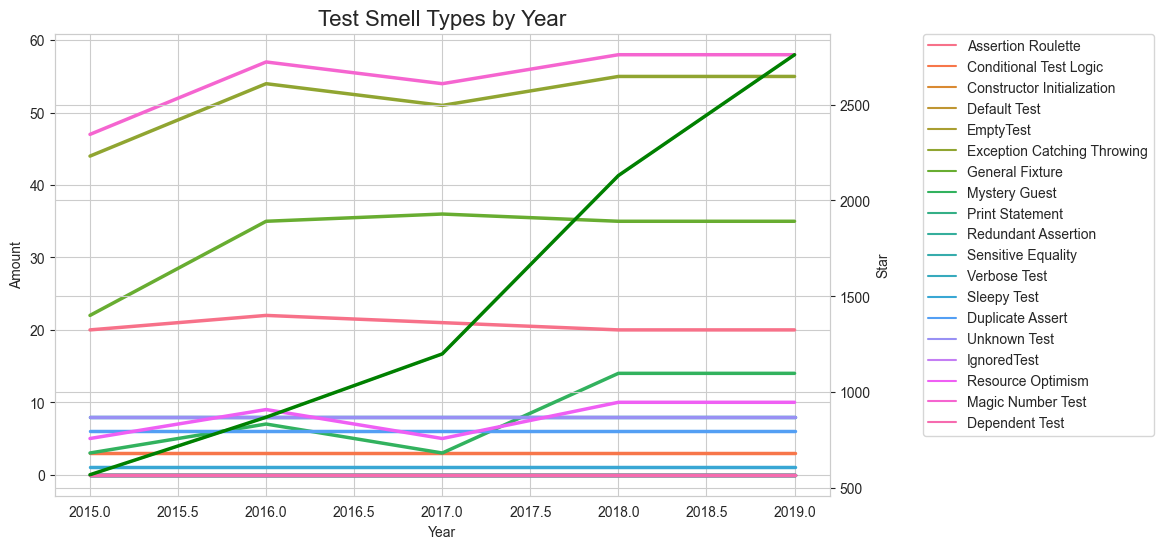

In [976]:
# create line chart with star
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
ax1 = sns.lineplot(data=all_list_hive_total.set_index('Year'), linewidth=2.5 ,x='Year', y='Amount',hue='Test_Smell_Type', dashes=False)
plt.legend(bbox_to_anchor=(1.12, 1), loc='upper left', borderaxespad=0)
ax2 = ax1.twinx()
sns.lineplot(data=all_list_hive_total.set_index('Year'),linewidth=2.5 ,x='Year', y='Star', color='green')
plt.title('Test Smell Types by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.show()

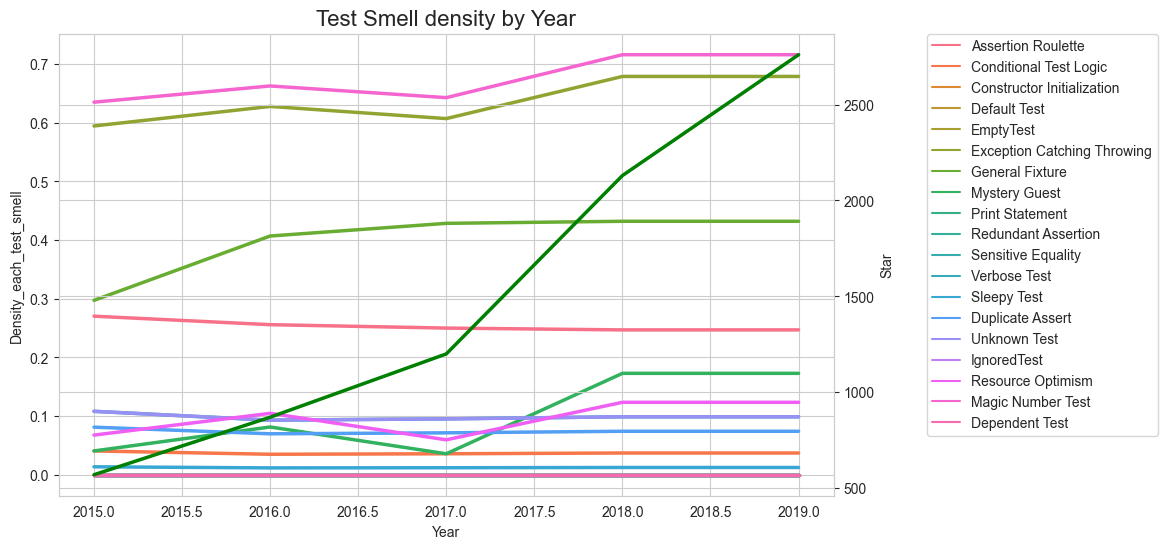

In [977]:
# create line chart with star
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
ax1 = sns.lineplot(data=all_list_hive_total.set_index('Year'), linewidth=2.5 ,x='Year', y='Density_each_test_smell',hue='Test_Smell_Type', dashes=False)
plt.legend(bbox_to_anchor=(1.12, 1), loc='upper left', borderaxespad=0)
ax2 = ax1.twinx()
sns.lineplot(data=all_list_hive_total.set_index('Year'),linewidth=2.5 ,x='Year', y='Star', color='green')
plt.title('Test Smell density by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
# plt.ylabel('Amount', fontsize=14)

plt.show()

In [978]:
test_semantic_smell = ['Assertion Roulette','Conditional Test Logic','Duplicate Assert', 'Eager Test', 'Lazy Test']
test_semantic_smell = all_list_hive_total[~all_list_hive_total.Test_Smell_Type.str.contains('|'.join(test_semantic_smell)) == False]
test_semantic_smell['Classification'] = 'test semantic'
temp = test_semantic_smell.groupby('Year')['Amount'].sum()
test_semantic_smell = test_semantic_smell.merge(temp.rename('Classification_Test_Smell_Total'), left_on='Year', right_on='Year')
issue_in_test_step = ['Exception Handling', 'General Fixture', 'Empty Test', 'Redundant Assertion', 'Unknown Test']
issue_in_test_step = all_list_hive_total[~all_list_hive_total.Test_Smell_Type.str.contains('|'.join(issue_in_test_step)) == False]
issue_in_test_step['Classification'] = 'issue in test step'
temp = issue_in_test_step.groupby('Year')['Amount'].sum()
issue_in_test_step = issue_in_test_step.merge(temp.rename('Classification_Test_Smell_Total'), left_on='Year', right_on='Year')
code_related = ['Magic Number Test', 'Redundant Print', 'Ignored Test']
code_related = all_list_hive_total[~all_list_hive_total.Test_Smell_Type.str.contains('|'.join(code_related)) == False]
code_related['Classification'] = 'code related'
temp = code_related.groupby('Year')['Amount'].sum()
code_related = code_related.merge(temp.rename('Classification_Test_Smell_Total'), left_on='Year', right_on='Year')
test_execution = ['Sensitive Equality', 'Sleepy Test']
test_execution = all_list_hive_total[~all_list_hive_total.Test_Smell_Type.str.contains('|'.join(test_execution)) == False]
test_execution['Classification'] = 'test execution'
temp = test_execution.groupby('Year')['Amount'].sum()
test_execution = test_execution.merge(temp.rename('Classification_Test_Smell_Total'), left_on='Year', right_on='Year')
dependencies = ['Mystery Guest', 'Resource Optimism']
dependencies = all_list_hive_total[~all_list_hive_total.Test_Smell_Type.str.contains('|'.join(dependencies)) == False]
dependencies['Classification'] = 'dependencies'
temp = dependencies.groupby('Year')['Amount'].sum()
dependencies = dependencies.merge(temp.rename('Classification_Test_Smell_Total'), left_on='Year', right_on='Year')
list_Classification = [test_semantic_smell, issue_in_test_step, code_related, test_execution, dependencies]
list_Classification = pd.concat(list_Classification)
list_Classification = list_Classification.reset_index(drop=True)
list_Classification
# list_classification = ['test semantic', 'issue in test step', 'code related', 'test execution', 'dependencies']

/var/folders/1w/yzvnkzw94wgdv0083vhb0dq00000gn/T/ipykernel_2104/2315044863.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_semantic_smell['Classification'] = 'test semantic'
/var/folders/1w/yzvnkzw94wgdv0083vhb0dq00000gn/T/ipykernel_2104/2315044863.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  issue_in_test_step['Classification'] = 'issue in test step'
/var/folders/1w/yzvnkzw94wgdv0083vhb0dq00000gn/T/ipykernel_2104/2315044863.py:13: SettingWithCopyWarning: 
A value is trying to be set on a co

,Test_Smell_Type,Amount,Year,Test_Smell_Total,Test_Method_Total,Star,Density_test_smell,Density_each_test_smell,Classification,Classification_Test_Smell_Total
0,Assertion Roulette,20,2015,167,74,570,2.256757,0.270270,test semantic,29
1,Conditional Test Logic,3,2015,167,74,570,2.256757,0.040541,test semantic,29
2,Duplicate Assert,6,2015,167,74,570,2.256757,0.081081,test semantic,29
3,Assertion Roulette,22,2016,210,86,870,2.441860,0.255814,test semantic,31
4,Conditional Test Logic,3,2016,210,86,870,2.441860,0.034884,test semantic,31
5,Duplicate Assert,6,2016,210,86,870,2.441860,0.069767,test semantic,31
6,Assertion Roulette,21,2017,196,84,1200,2.333333,0.250000,test semantic,30
7,Conditional Test Logic,3,2017,196,84,1200,2.333333,0.035714,test semantic,30
8,Duplicate Assert,6,2017,196,84,1200,2.333333,0.071429,test semantic,30
9,Assertion Roulette,20,2018,218,81,2130,2.691358,0.246914,test semantic,29


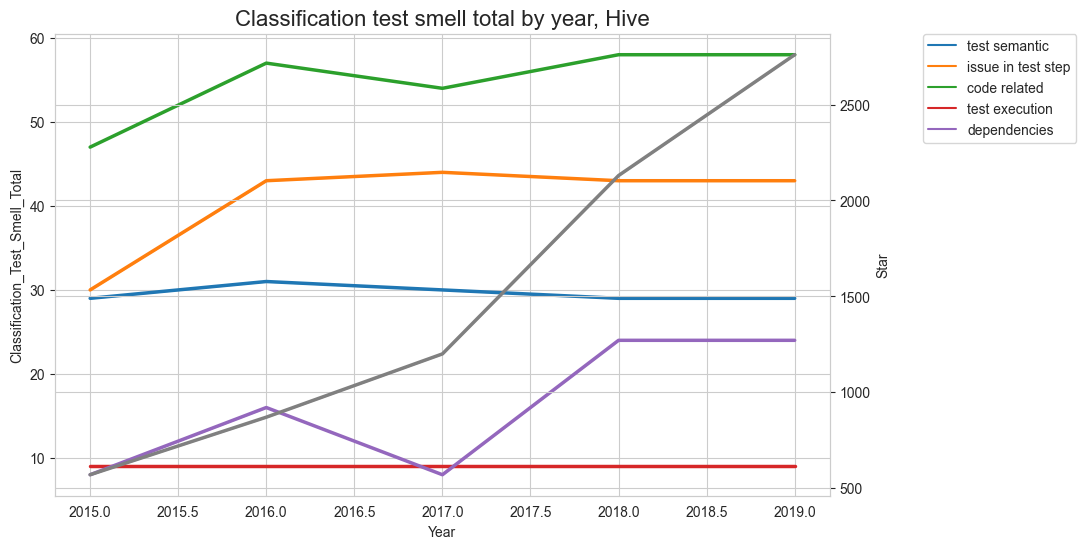

In [979]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
ax1 = sns.lineplot(data=list_Classification.set_index('Year'), linewidth=2.5 ,x='Year', y='Classification_Test_Smell_Total' ,hue='Classification', dashes=False)
plt.legend(bbox_to_anchor=(1.12, 1), loc='upper left', borderaxespad=0)
ax2 = ax1.twinx()
sns.lineplot(data=all_list_hive_total.set_index('Year'),linewidth=2.5 ,x='Year', y='Star', color='gray')
plt.title('Classification test smell total by year, Hive', fontsize=16)
plt.xlabel('Year', fontsize=14)
# plt.ylabel('Amount', fontsize=14)

plt.show()

### Classification by Vahid Garousi 2018

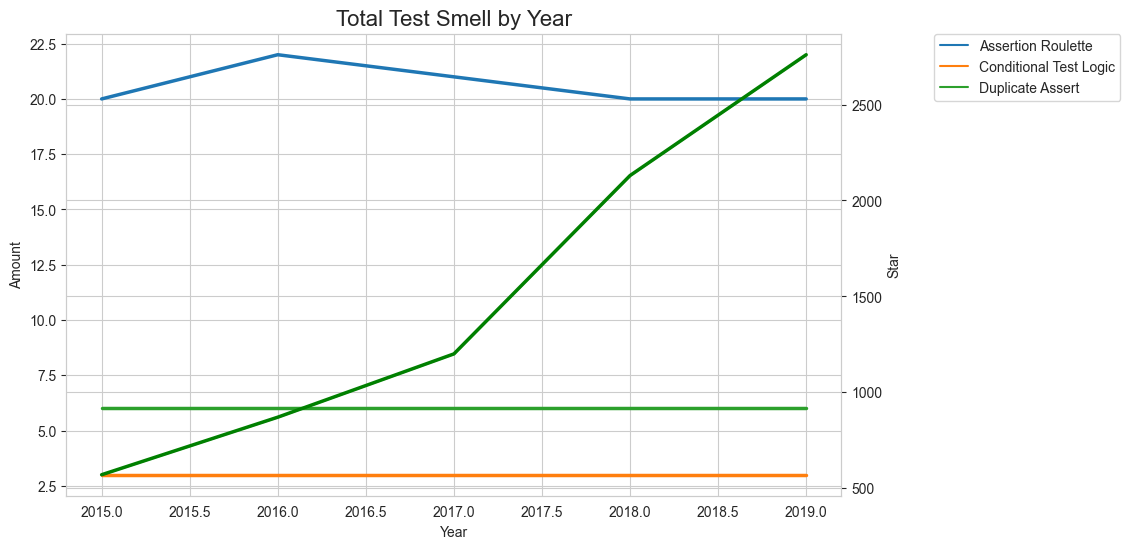

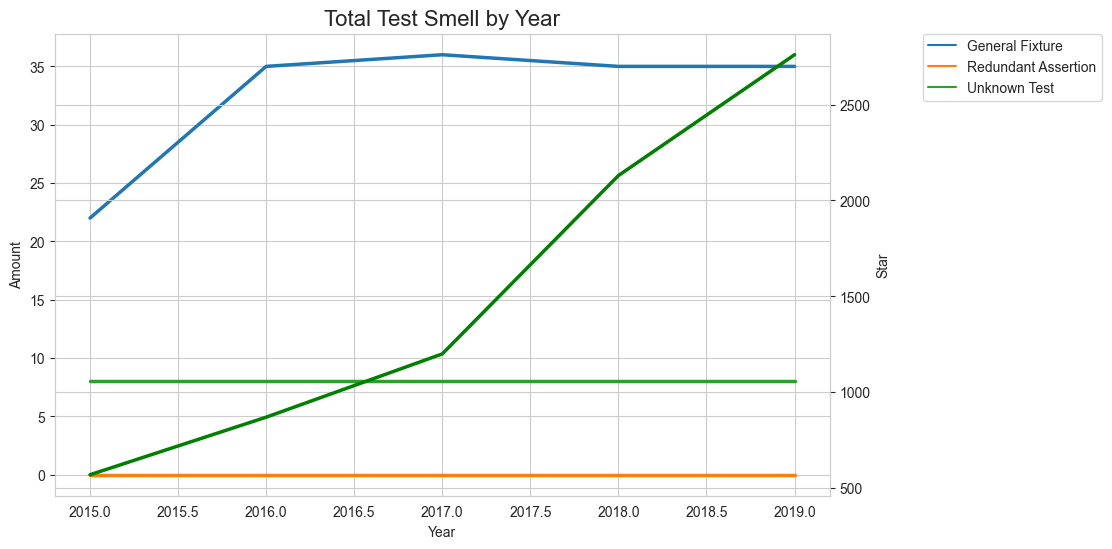

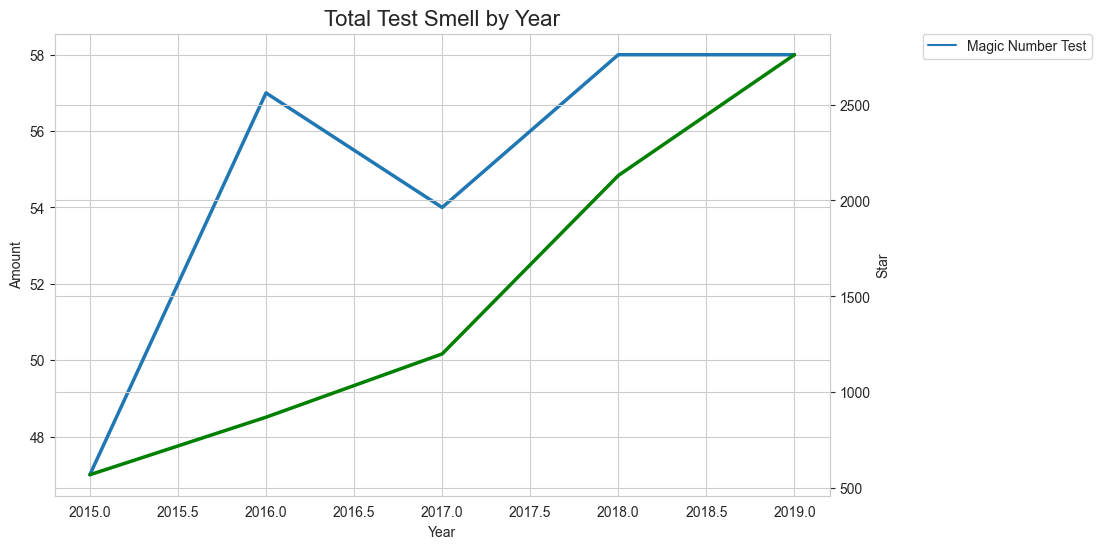

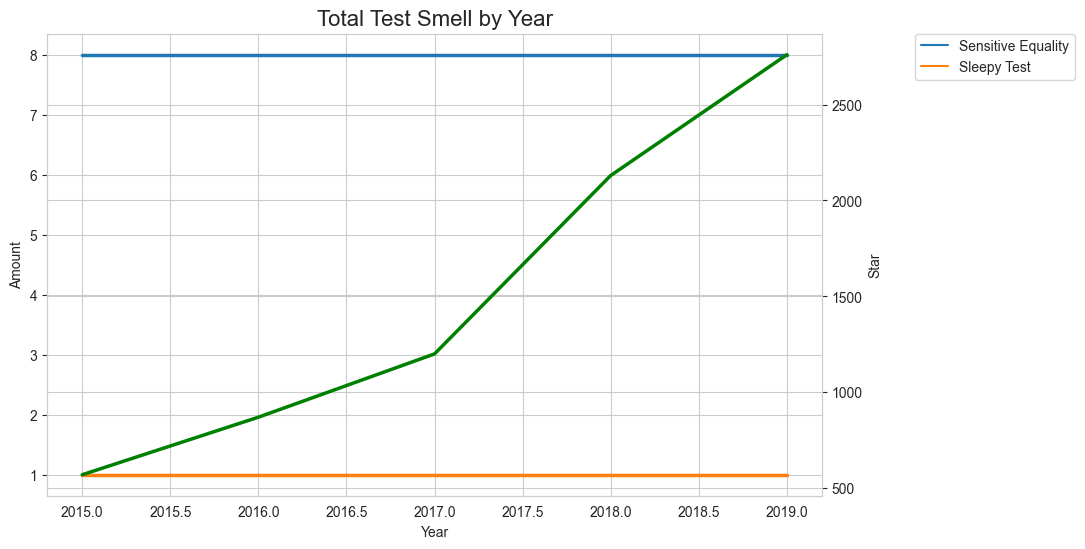

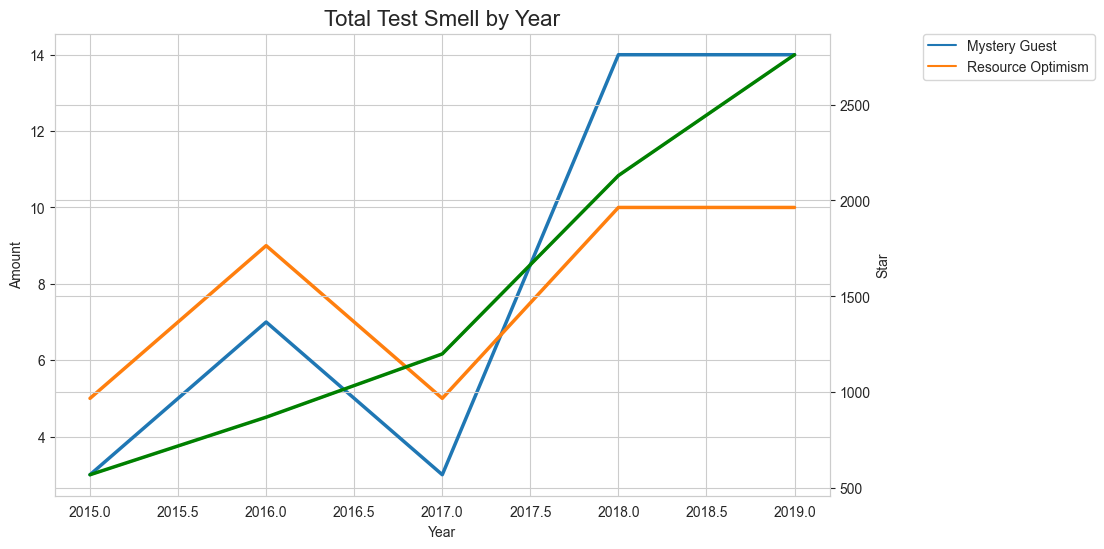

In [980]:
sns.set_style("whitegrid")
listClassification = [test_semantic_smell, issue_in_test_step, code_related, test_execution, dependencies]

for a in listClassification:
    plt.figure(figsize=(10,6))
    ax1 = sns.lineplot(data=a.set_index('Year'), linewidth=2.5 ,x='Year', y='Amount',hue='Test_Smell_Type', dashes=False)
    plt.legend(bbox_to_anchor=(1.12, 1), loc='upper left', borderaxespad=0)
    ax2 = ax1.twinx()
    sns.lineplot(data=all_list_hive_total.set_index('Year'),linewidth=2.5 ,x='Year', y='Star', color='green')
    plt.title('Total Test Smell by Year', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    # plt.ylabel('Amount', fontsize=14)
    plt.show()

## Most discuss until 2018

In [981]:
most_discuss = ['Assertion Roulette', 'Eager Test', 'General Fixture', 'Mystery Guest', 'Redundant Print', 'Redundant Assertion']
most_discuss = all_list_hive_total[~all_list_hive_total.Test_Smell_Type.str.contains('|'.join(most_discuss)) == False]

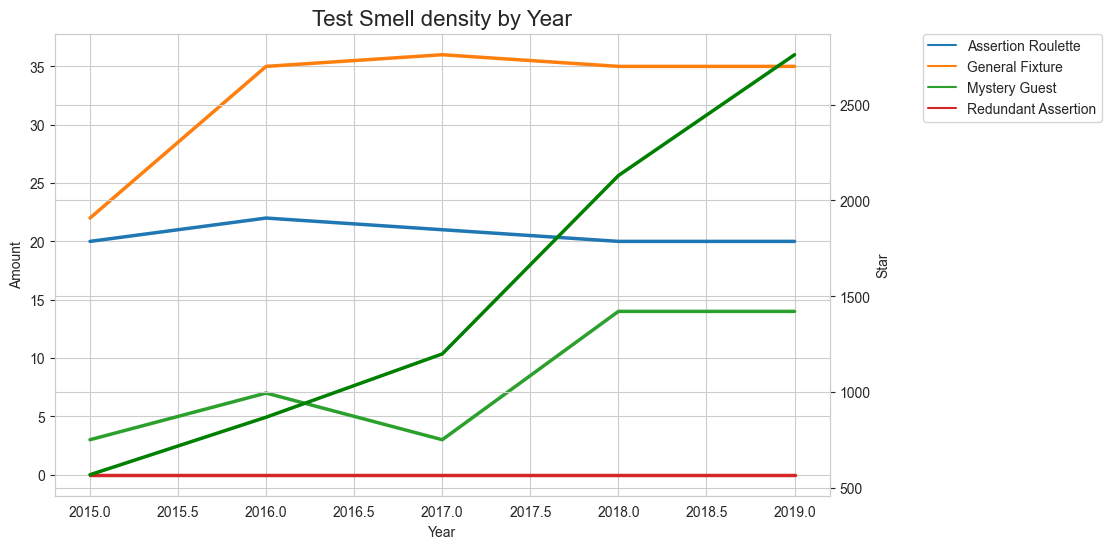

In [982]:
sns.set_style("whitegrid")

plt.figure(figsize=(10,6))
ax1 = sns.lineplot(data=most_discuss.set_index('Year'), linewidth=2.5 ,x='Year', y='Amount',hue='Test_Smell_Type', dashes=False)
plt.legend(bbox_to_anchor=(1.12, 1), loc='upper left', borderaxespad=0)
ax2 = ax1.twinx()
sns.lineplot(data=all_list_hive_total.set_index('Year'),linewidth=2.5 ,x='Year', y='Star', color='green')
plt.title('Test Smell density by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
# plt.ylabel('Amount', fontsize=14)
plt.show()

/var/folders/1w/yzvnkzw94wgdv0083vhb0dq00000gn/T/ipykernel_2104/2183006603.py:6: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=data, x='Amount', y='Test_Method_Total', hue='Test_Smell_Type')
/var/folders/1w/yzvnkzw94wgdv0083vhb0dq00000gn/T/ipykernel_2104/2183006603.py:6: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=data, x='Amount', y='Test_Method_Total', hue='Test_Smell_Type')
/var/folders/1w/yzvnkzw94wgdv0083vhb0dq00000gn/T/ipykernel_2104/2183006603.py:6: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=data, x='Amount', y='Test_Method_Total', hue='Test_Smell_Type')
/var/folders/1w/yzvnkzw94wgdv0083vhb0dq00000gn/T/ipykernel_2104/2183006603.py:6: UserWarning: KDE cannot be estimated (0 variance or 

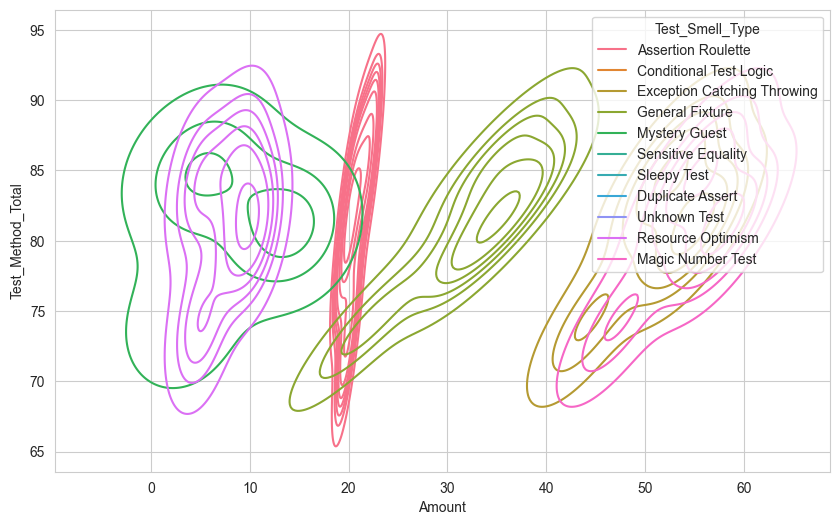

,Test_Smell_Type,Amount,Year,Test_Smell_Total,Test_Method_Total,Star,Density_test_smell,Density_each_test_smell
0,Assertion Roulette,20,2015,167,74,570,2.256757,0.270270
1,Conditional Test Logic,3,2015,167,74,570,2.256757,0.040541
5,Exception Catching Throwing,44,2015,167,74,570,2.256757,0.594595
6,General Fixture,22,2015,167,74,570,2.256757,0.297297
7,Mystery Guest,3,2015,167,74,570,2.256757,0.040541
10,Sensitive Equality,8,2015,167,74,570,2.256757,0.108108
12,Sleepy Test,1,2015,167,74,570,2.256757,0.013514
13,Duplicate Assert,6,2015,167,74,570,2.256757,0.081081
14,Unknown Test,8,2015,167,74,570,2.256757,0.108108
16,Resource Optimism,5,2015,167,74,570,2.256757,0.067568


In [983]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))

data = all_list_hive_total[(all_list_hive_total != 0).all(1)]

sns.kdeplot(data=data, x='Amount', y='Test_Method_Total', hue='Test_Smell_Type')
# plt.legend(loc='center right', title='test smell type',fontsize="x-large", bbox_to_anchor=(1.2, 0.5))
plt.show()
data
# datanew = all_list_hive_total[(all_list_hive_total != 0).all(1)]
# datanew

/var/folders/1w/yzvnkzw94wgdv0083vhb0dq00000gn/T/ipykernel_2104/3065563908.py:6: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(x='Test_Smell_Total', y='Test_Method_Total',  data=all_list_hive_total, cmap="Reds", shade=True, shade_lowest=False)
/var/folders/1w/yzvnkzw94wgdv0083vhb0dq00000gn/T/ipykernel_2104/3065563908.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='Test_Smell_Total', y='Test_Method_Total',  data=all_list_hive_total, cmap="Reds", shade=True, shade_lowest=False)


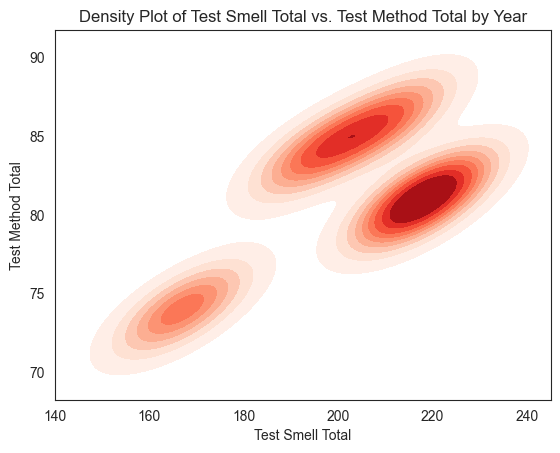

In [984]:

# Create a scatter plot with Test_Smell_Total and Test_Method_Total
sns.set_style('white')
sns.scatterplot(x='Test_Smell_Total', y='Test_Method_Total', data=all_list_hive_total, alpha=0.5)

# Create a heatmap to show density in each year
sns.kdeplot(x='Test_Smell_Total', y='Test_Method_Total',  data=all_list_hive_total, cmap="Reds", shade=True, shade_lowest=False)

# Add labels and title
plt.xlabel('Test Smell Total')
plt.ylabel('Test Method Total')
plt.title('Density Plot of Test Smell Total vs. Test Method Total by Year')

plt.show()

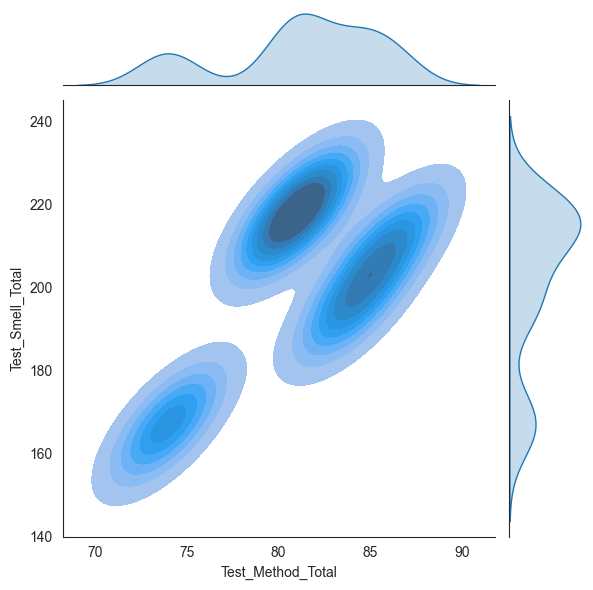

In [985]:
sns.jointplot(data=all_list_hive_total, x="Test_Method_Total", y="Test_Smell_Total", kind="kde", fill=True)

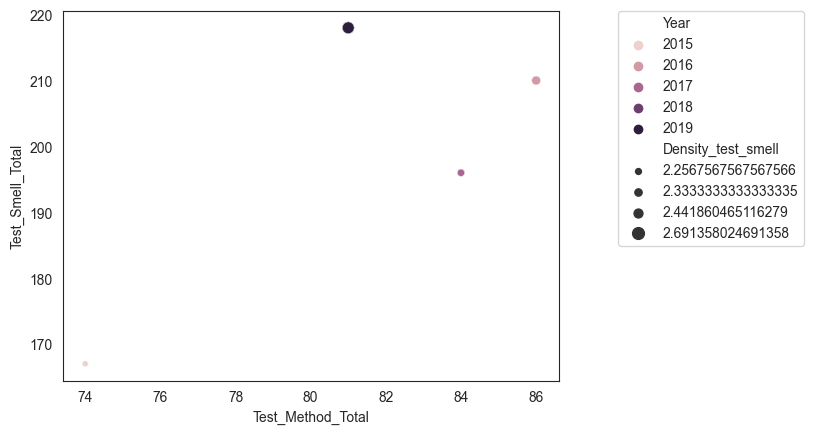

In [986]:
sns.scatterplot(data=all_list_hive_total, x='Test_Method_Total', y='Test_Smell_Total', size='Density_test_smell', hue='Year')
plt.legend(bbox_to_anchor=(1.12, 1), loc='upper left', borderaxespad=0)


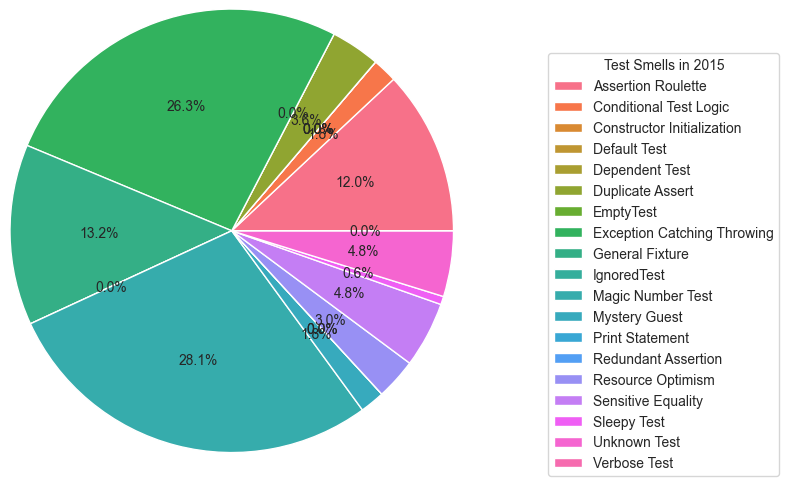

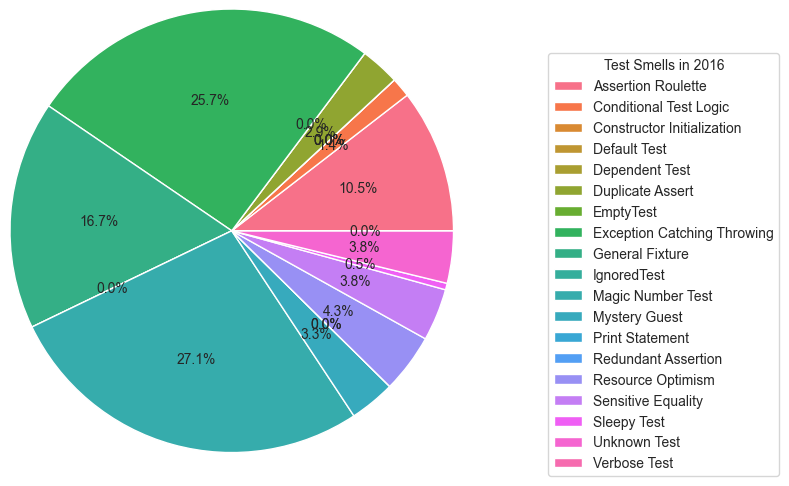

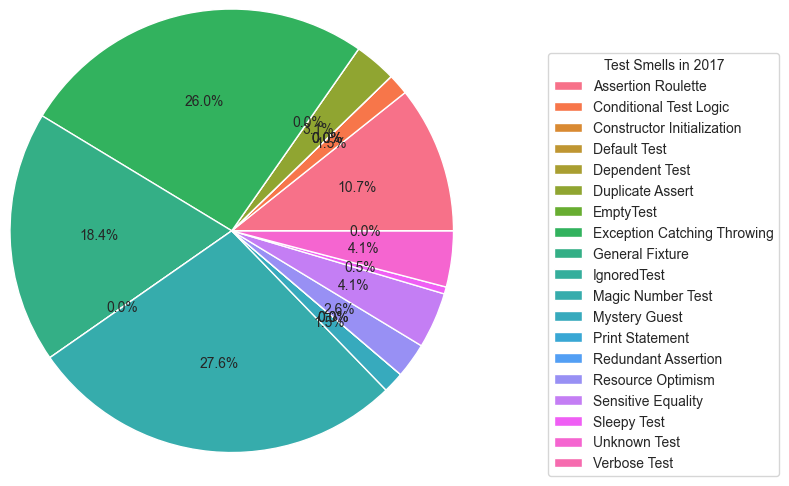

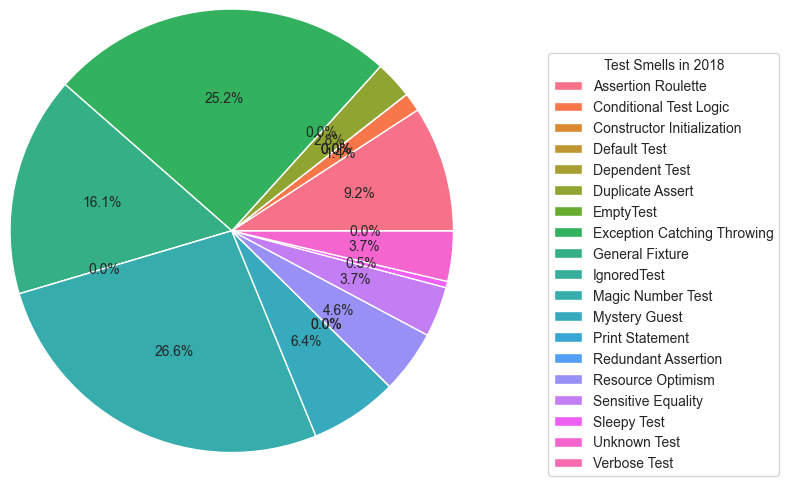

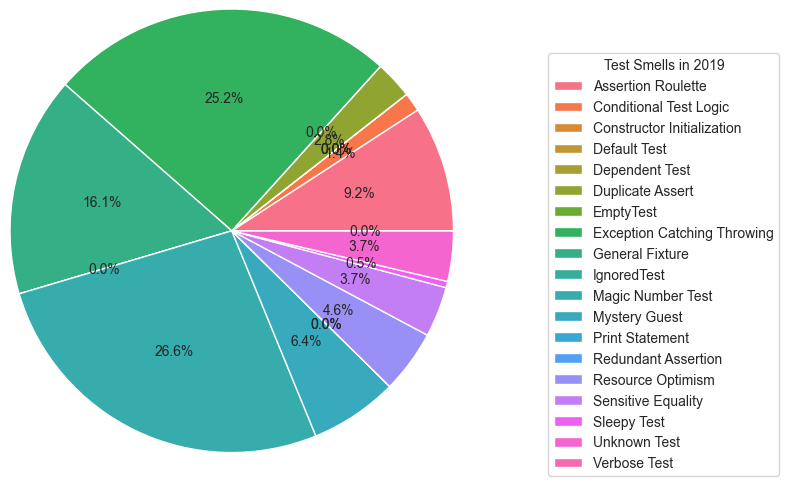

In [987]:
# Group the data by Test Smell Type and sum the Amount column
grouped = all_list_hive_total.groupby('Year')

for year, data in grouped:
    # Get the sum of each test smell type for the current year
    sums = data.groupby('Test_Smell_Type')['Amount'].sum()

    # Create the pie chart
    colors = sns.color_palette("husl", 19)
    plt.pie(sums, autopct='%1.1f%%', radius=1.5, colors=colors)
    plt.legend(sums.index, loc="upper right",bbox_to_anchor=(2, 1), title=f'Test Smells in {year}')
    plt.show()

In [988]:
def test_smell_show_inEachClass(column):
    plt.figure(figsize=(10,5))
    g = sns.scatterplot(data=hive_2015, x="TestClass", y=column)
    g.set_xticklabels(g.get_xticklabels(),rotation=90)
    plt.show()

In [989]:
pivot_table = pd.pivot_table(all_list_hive_total, values='Amount', index=['Test_Smell_Type'], columns=['Year'], aggfunc='mean')
pivot_table

Year,2015,2016,2017,2018,2019
Test_Smell_Type,,,,,
Assertion Roulette,20,22,21,20,20
Conditional Test Logic,3,3,3,3,3
Constructor Initialization,0,0,0,0,0
Default Test,0,0,0,0,0
Dependent Test,0,0,0,0,0
Duplicate Assert,6,6,6,6,6
EmptyTest,0,0,0,0,0
Exception Catching Throwing,44,54,51,55,55
General Fixture,22,35,36,35,35


/var/folders/1w/yzvnkzw94wgdv0083vhb0dq00000gn/T/ipykernel_2104/1906124443.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


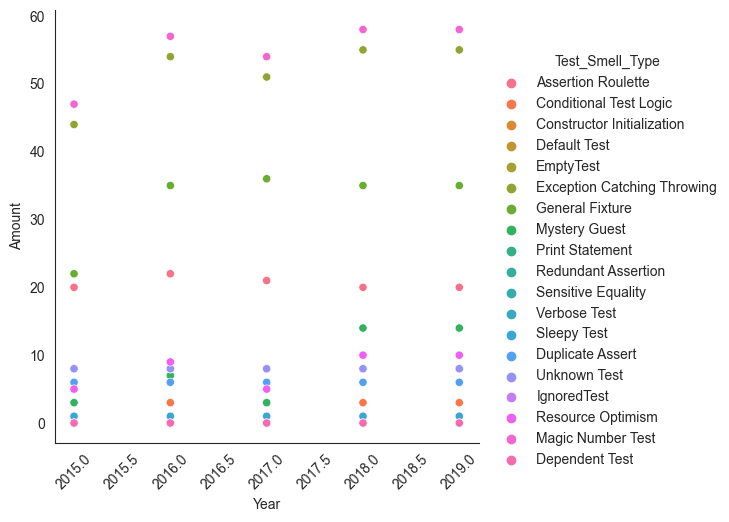

In [990]:
g = sns.pairplot(data=all_list_hive_total, hue='Test_Smell_Type', x_vars=['Year'], y_vars=['Amount'], height=5)
for ax in g.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()


From graph pairplot above, You will see the Case that are always high is ***Magic Number*** and ***Exception Catching Throwing*** Seem like they won't try to fix those Test_Smell at all. At the hive project its seem like stable, but in the cassandar trend on those test smell is slightly high in each year(2018 look like they change all the code or migrate to use Junit5)

<AxesSubplot: xlabel='Year', ylabel='Test_Smell_Type'>

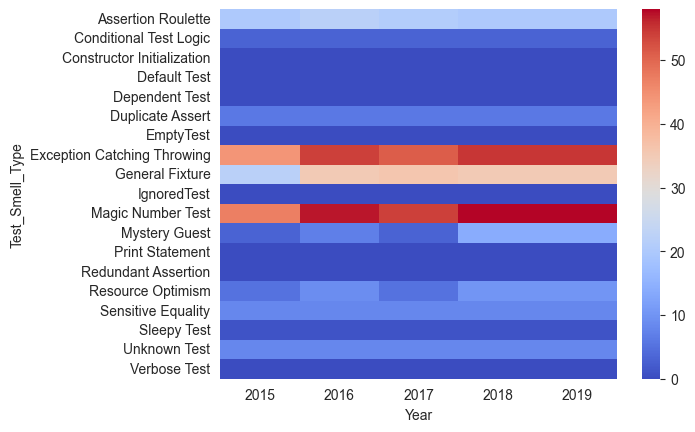

In [991]:
sns.heatmap(pivot_table, cmap='coolwarm')

For this heatmap we change the style of graph to investigate more trend of this data. **In Hive project**, You can see the test smell are not decrease from year to year at all, **same as the cassandar** too.

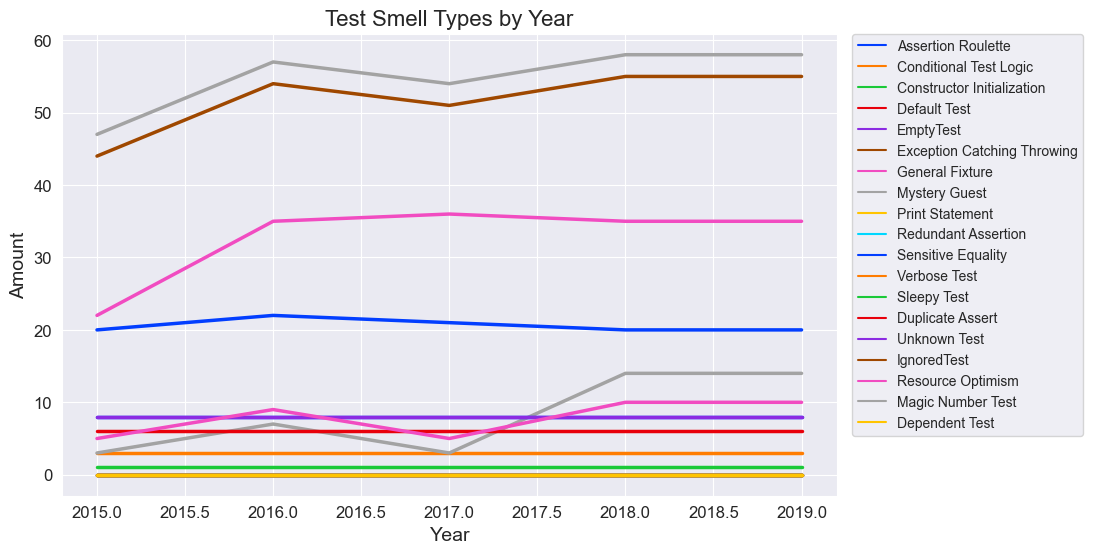

In [992]:
sns.set_style("darkgrid")

plt.figure(figsize=(10,6))
sns.lineplot(data=all_list_hive_total, x="Year", y="Amount", hue="Test_Smell_Type", linewidth=2.5, palette="bright")
plt.title("Test Smell Types by Year", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Amount", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [993]:
feature = ['NumberOfMethods', 'Assertion Roulette',
       'Conditional Test Logic', 'Constructor Initialization', 'Default Test',
       'EmptyTest', 'Exception Catching Throwing', 'General Fixture',
       'Mystery Guest', 'Print Statement', 'Redundant Assertion',
       'Sensitive Equality', 'Verbose Test', 'Sleepy Test', 'Eager Test',
       'Lazy Test', 'Duplicate Assert', 'Unknown Test', 'IgnoredTest',
       'Resource Optimism', 'Magic Number Test', 'Dependent Test']
list(enumerate(feature))

[(0, 'NumberOfMethods'),
 (1, 'Assertion Roulette'),
 (2, 'Conditional Test Logic'),
 (3, 'Constructor Initialization'),
 (4, 'Default Test'),
 (5, 'EmptyTest'),
 (6, 'Exception Catching Throwing'),
 (7, 'General Fixture'),
 (8, 'Mystery Guest'),
 (9, 'Print Statement'),
 (10, 'Redundant Assertion'),
 (11, 'Sensitive Equality'),
 (12, 'Verbose Test'),
 (13, 'Sleepy Test'),
 (14, 'Eager Test'),
 (15, 'Lazy Test'),
 (16, 'Duplicate Assert'),
 (17, 'Unknown Test'),
 (18, 'IgnoredTest'),
 (19, 'Resource Optimism'),
 (20, 'Magic Number Test'),
 (21, 'Dependent Test')]

/var/folders/1w/yzvnkzw94wgdv0083vhb0dq00000gn/T/ipykernel_2104/1890560810.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(),rotation=90)


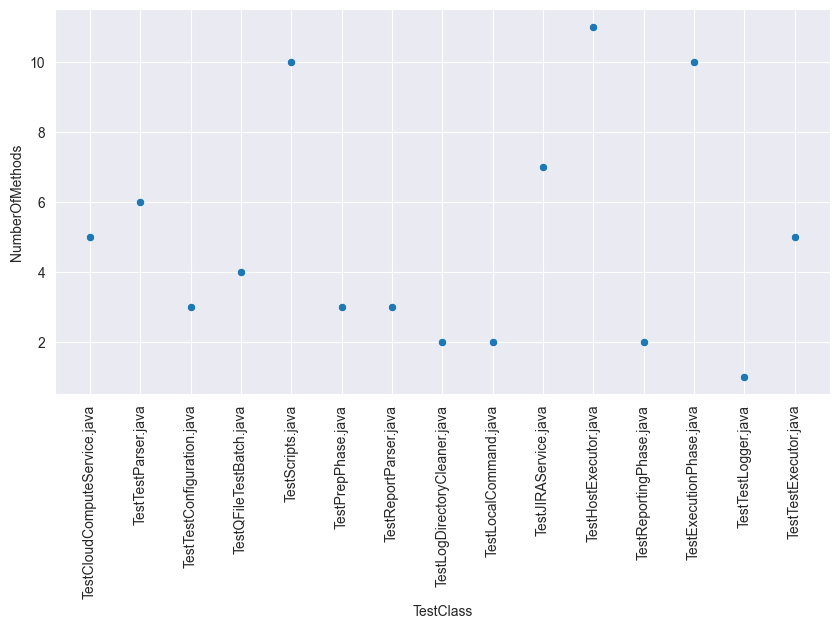

/var/folders/1w/yzvnkzw94wgdv0083vhb0dq00000gn/T/ipykernel_2104/1890560810.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(),rotation=90)


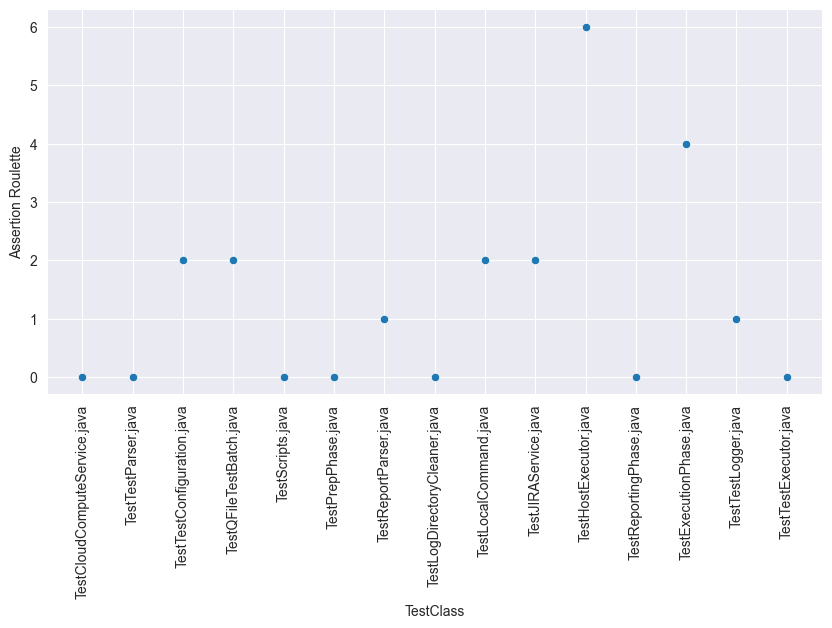

/var/folders/1w/yzvnkzw94wgdv0083vhb0dq00000gn/T/ipykernel_2104/1890560810.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(),rotation=90)


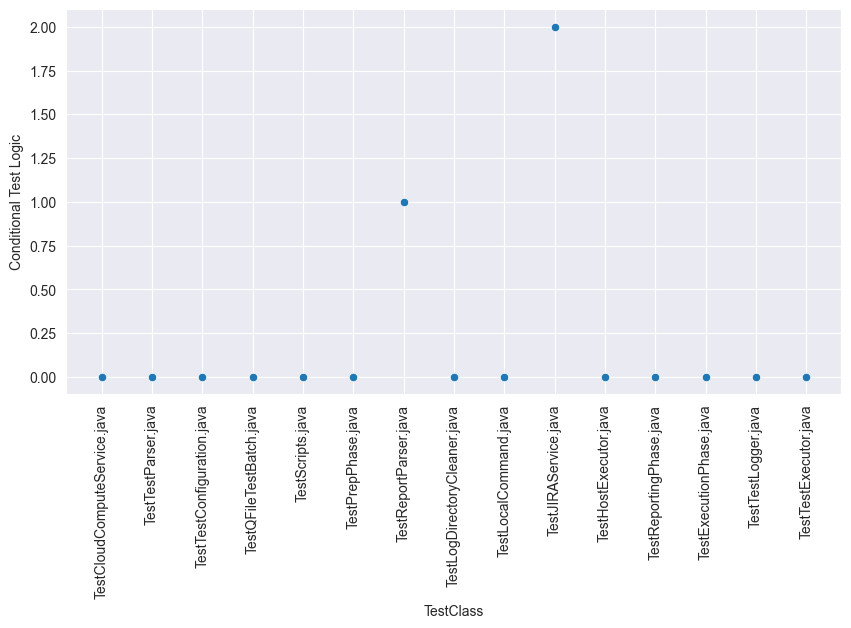

/var/folders/1w/yzvnkzw94wgdv0083vhb0dq00000gn/T/ipykernel_2104/1890560810.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(),rotation=90)


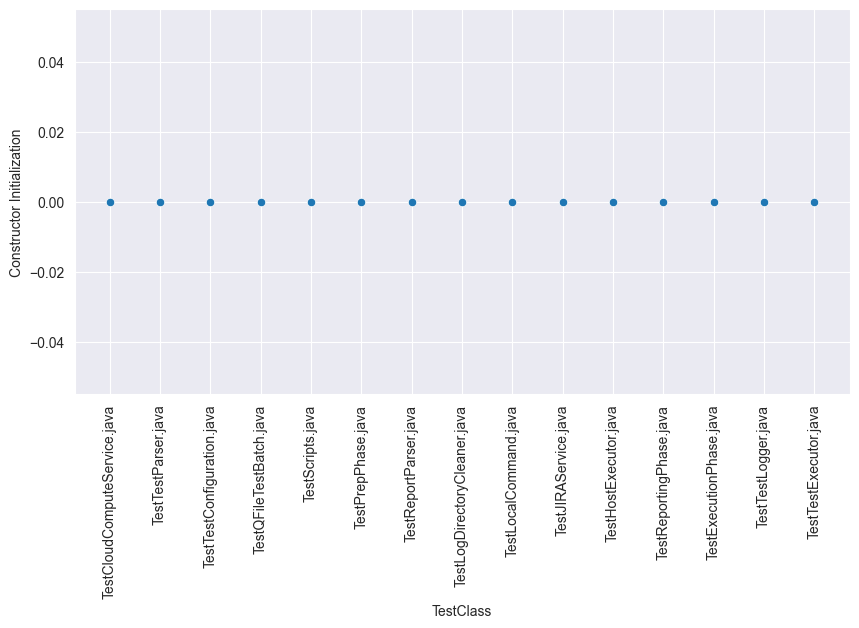

/var/folders/1w/yzvnkzw94wgdv0083vhb0dq00000gn/T/ipykernel_2104/1890560810.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(),rotation=90)


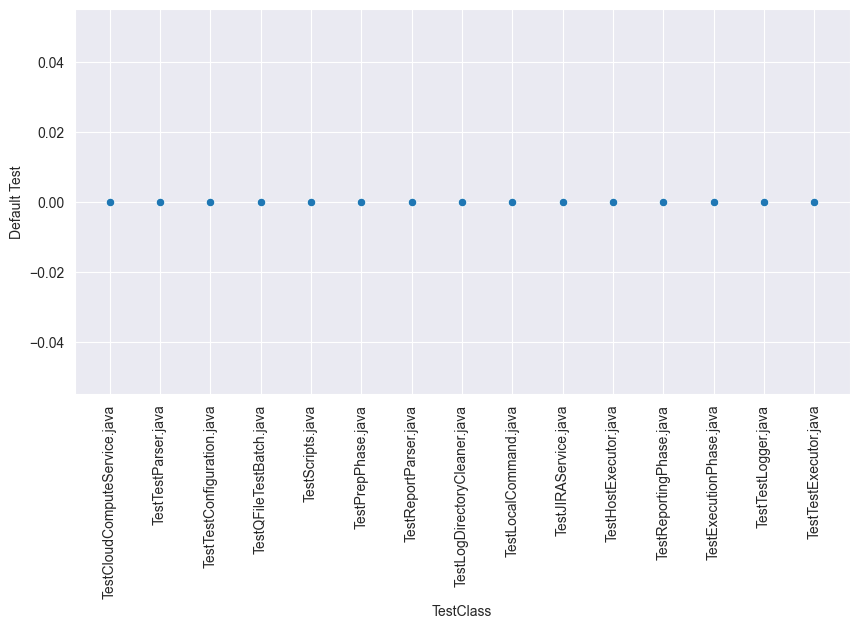

/var/folders/1w/yzvnkzw94wgdv0083vhb0dq00000gn/T/ipykernel_2104/1890560810.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(),rotation=90)


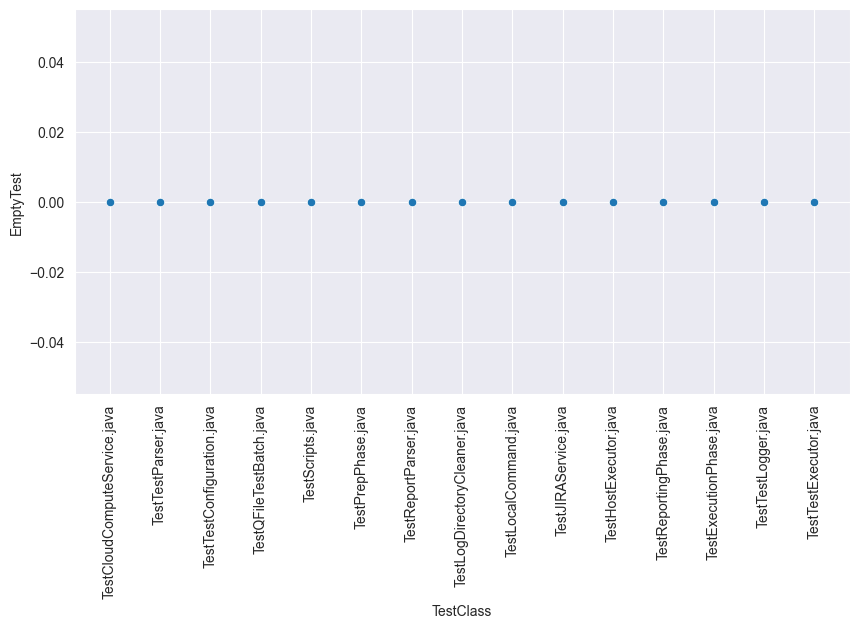

/var/folders/1w/yzvnkzw94wgdv0083vhb0dq00000gn/T/ipykernel_2104/1890560810.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(),rotation=90)


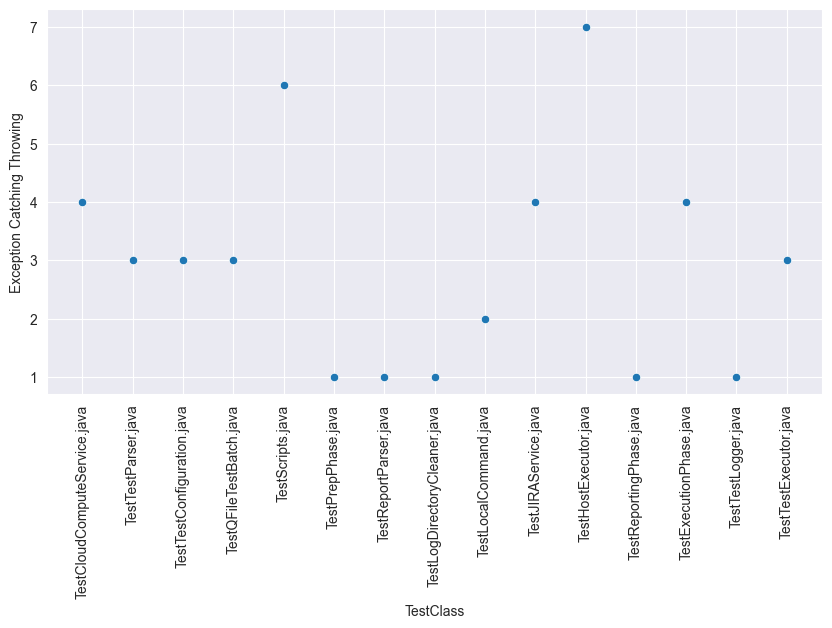

/var/folders/1w/yzvnkzw94wgdv0083vhb0dq00000gn/T/ipykernel_2104/1890560810.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(),rotation=90)


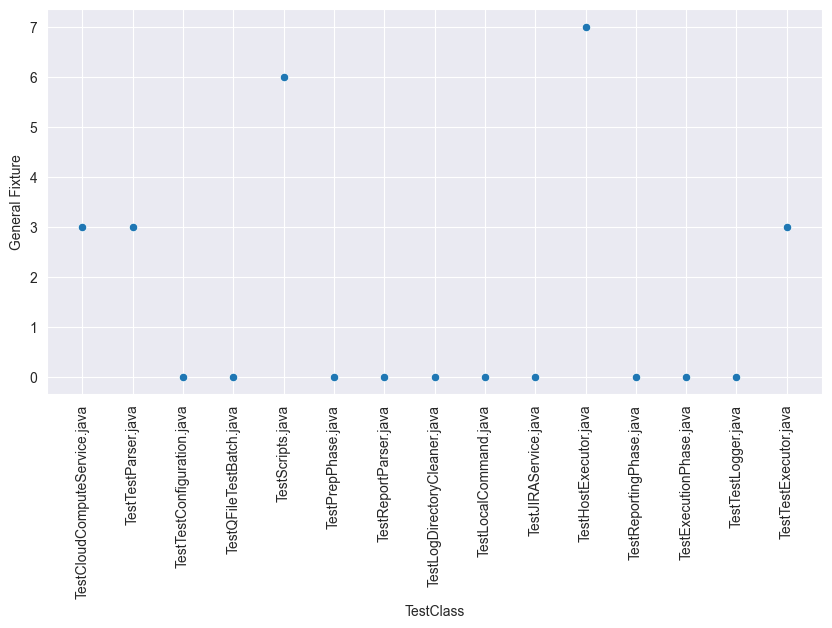

/var/folders/1w/yzvnkzw94wgdv0083vhb0dq00000gn/T/ipykernel_2104/1890560810.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(),rotation=90)


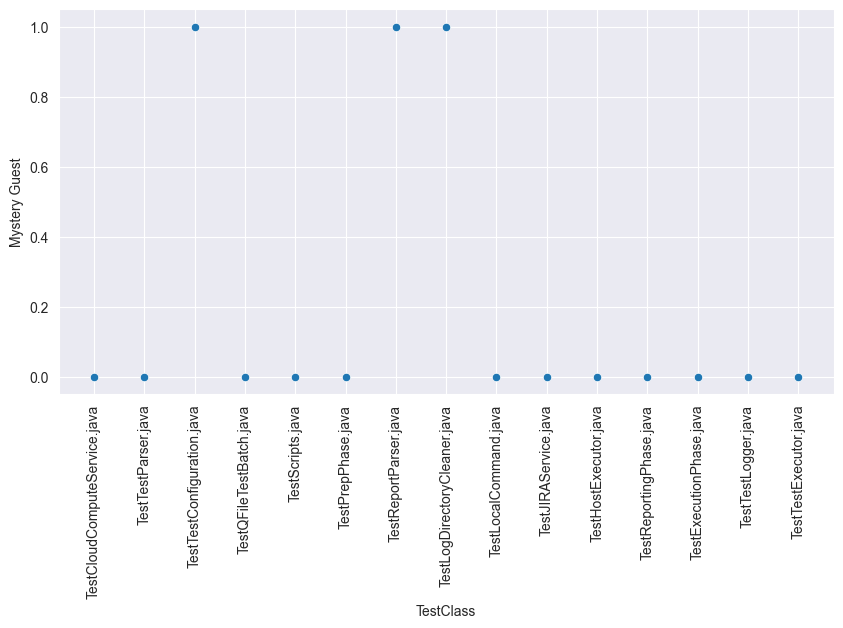

/var/folders/1w/yzvnkzw94wgdv0083vhb0dq00000gn/T/ipykernel_2104/1890560810.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(),rotation=90)


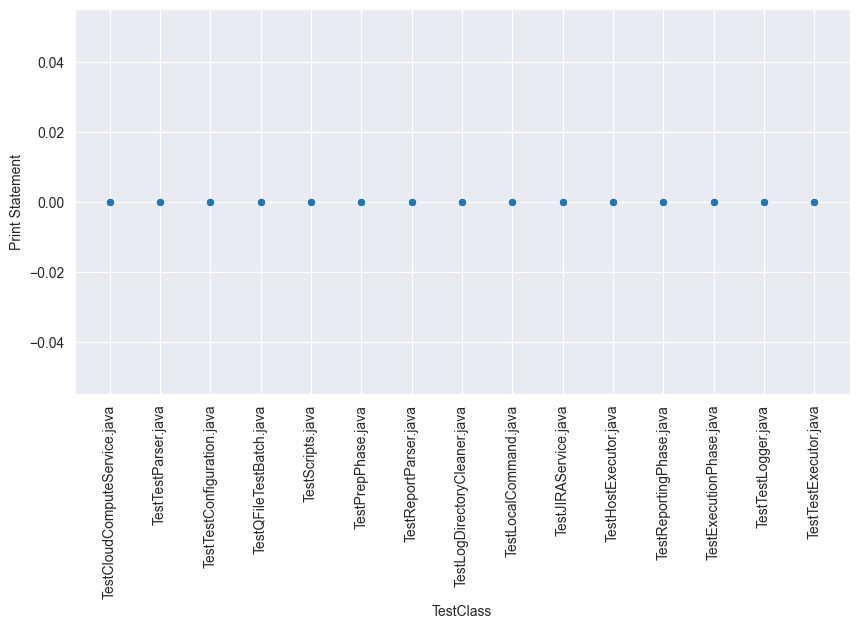

/var/folders/1w/yzvnkzw94wgdv0083vhb0dq00000gn/T/ipykernel_2104/1890560810.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(),rotation=90)


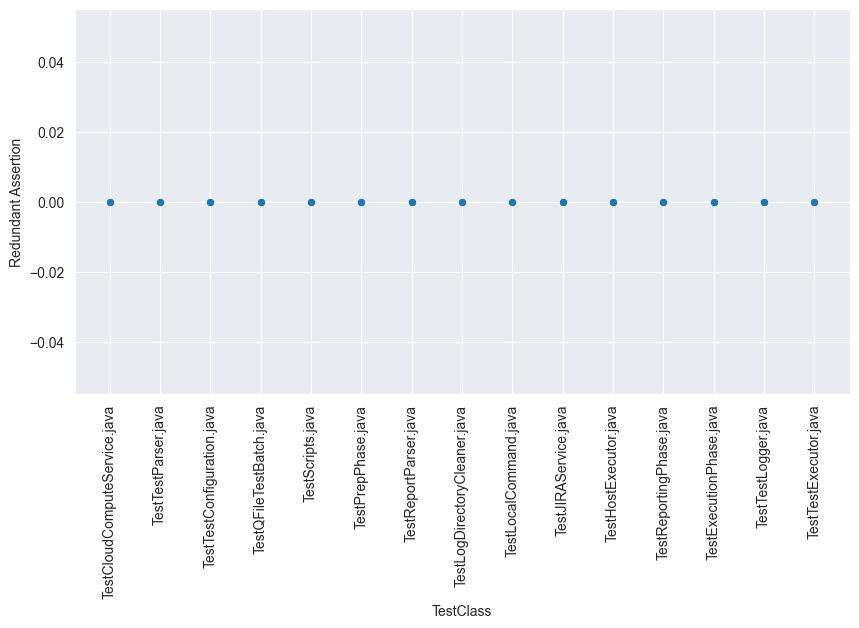

/var/folders/1w/yzvnkzw94wgdv0083vhb0dq00000gn/T/ipykernel_2104/1890560810.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(),rotation=90)


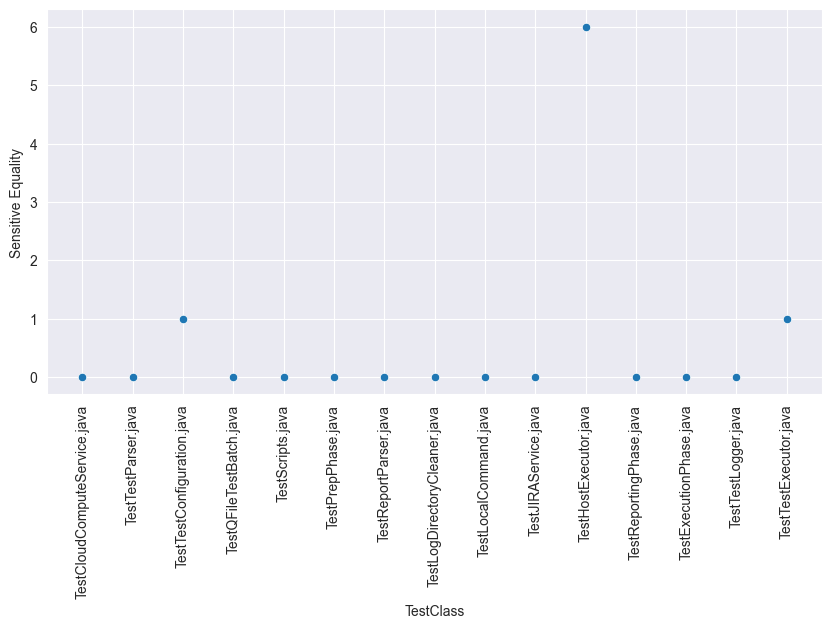

/var/folders/1w/yzvnkzw94wgdv0083vhb0dq00000gn/T/ipykernel_2104/1890560810.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(),rotation=90)


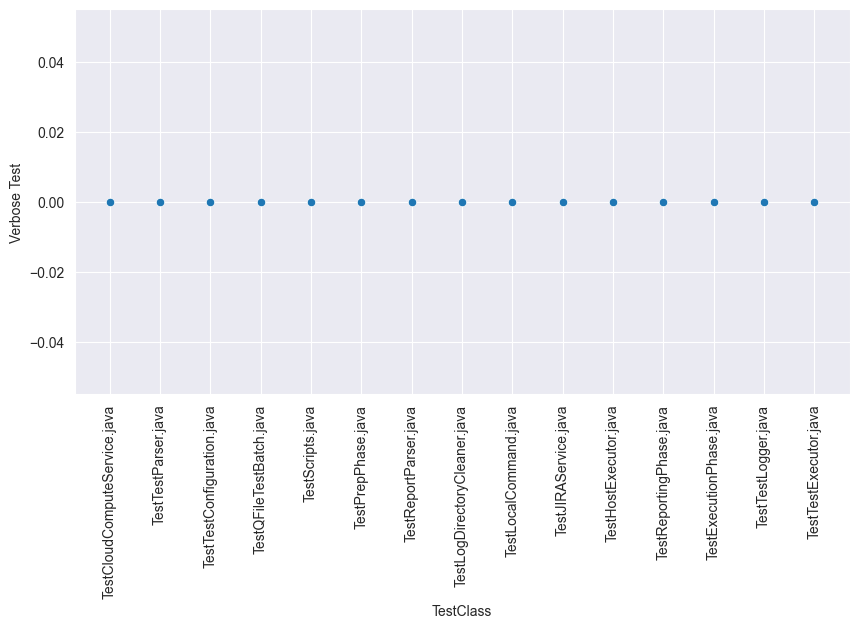

/var/folders/1w/yzvnkzw94wgdv0083vhb0dq00000gn/T/ipykernel_2104/1890560810.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(),rotation=90)


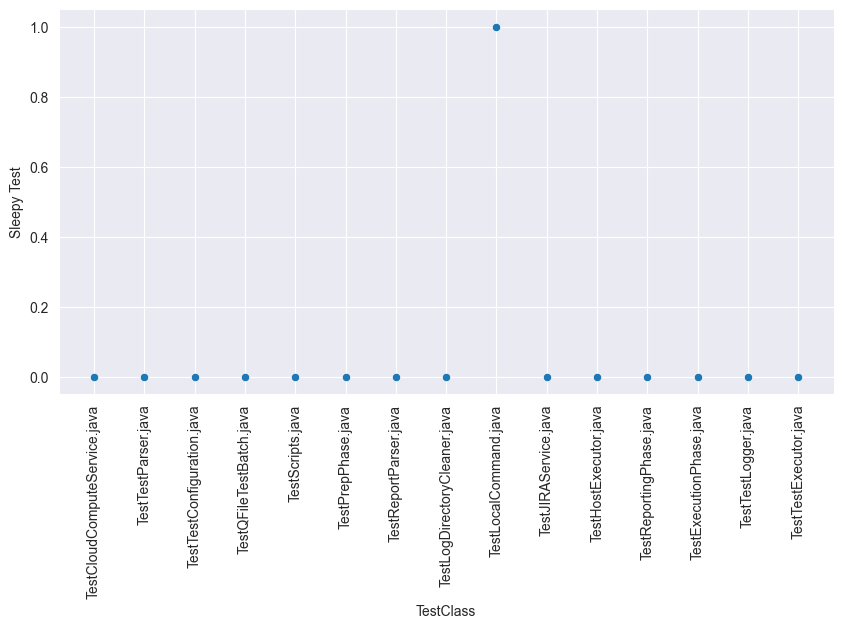

/var/folders/1w/yzvnkzw94wgdv0083vhb0dq00000gn/T/ipykernel_2104/1890560810.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(),rotation=90)


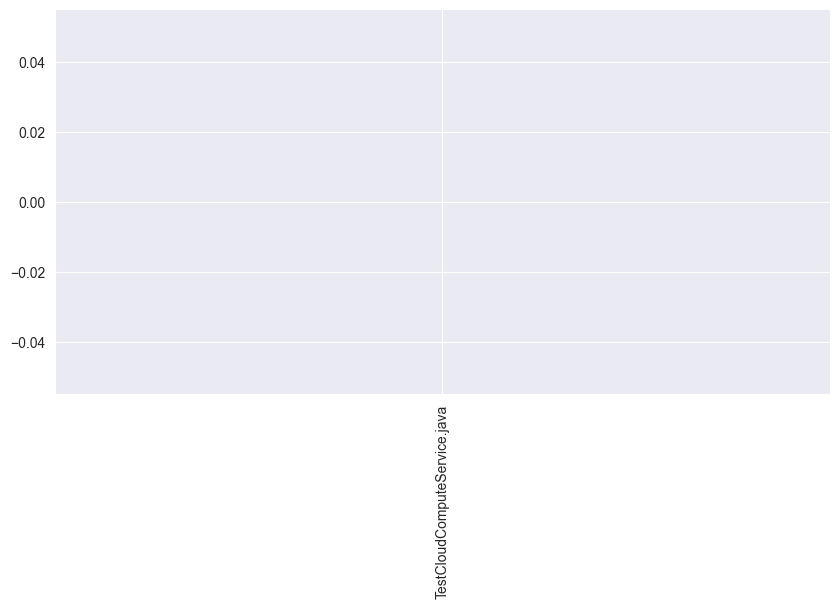

/var/folders/1w/yzvnkzw94wgdv0083vhb0dq00000gn/T/ipykernel_2104/1890560810.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(),rotation=90)


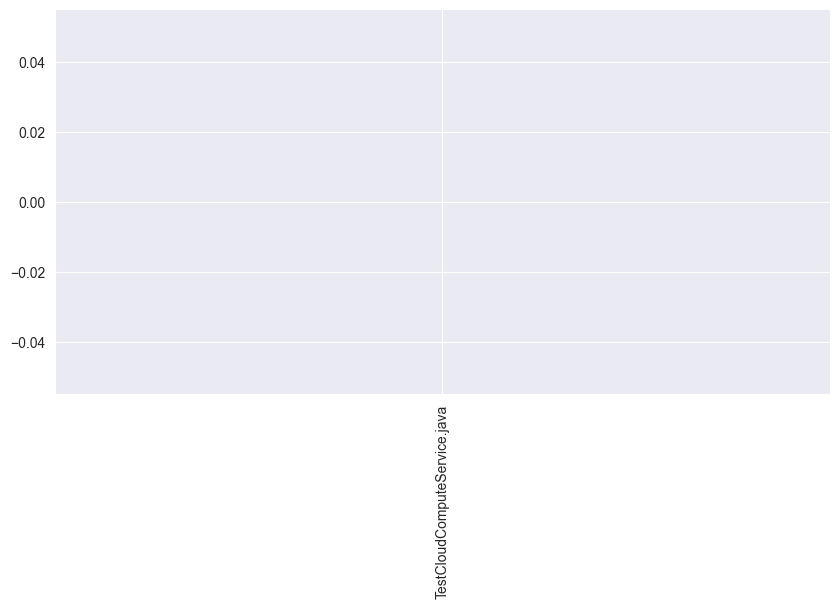

/var/folders/1w/yzvnkzw94wgdv0083vhb0dq00000gn/T/ipykernel_2104/1890560810.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(),rotation=90)


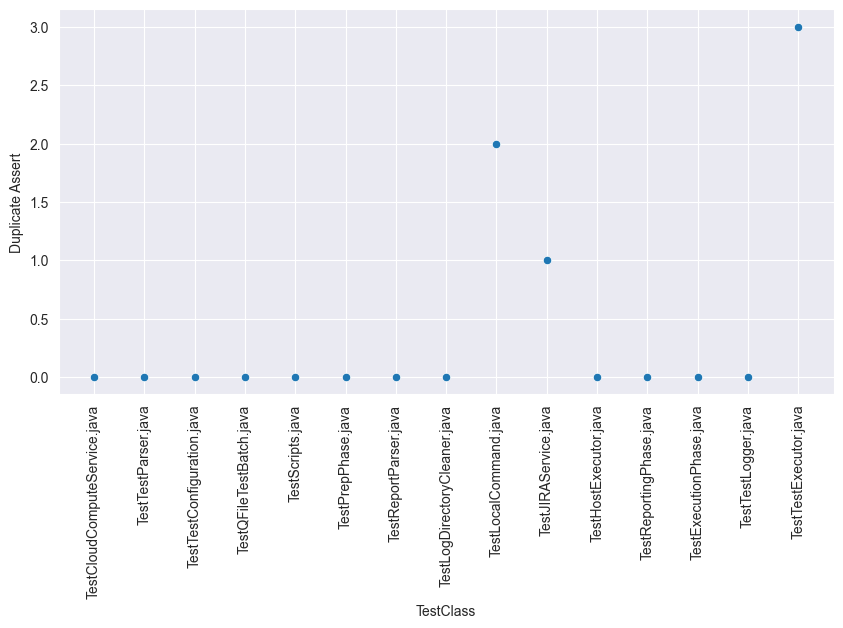

/var/folders/1w/yzvnkzw94wgdv0083vhb0dq00000gn/T/ipykernel_2104/1890560810.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(),rotation=90)


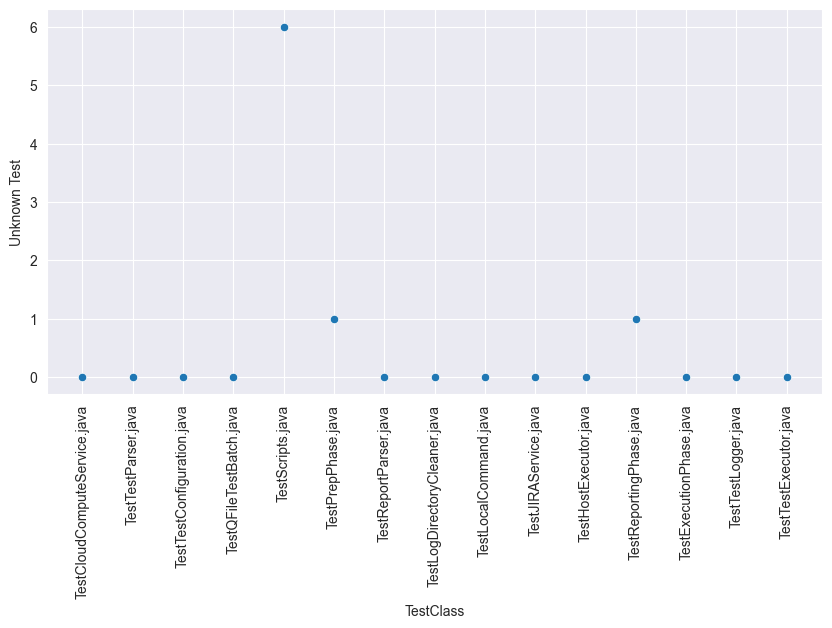

/var/folders/1w/yzvnkzw94wgdv0083vhb0dq00000gn/T/ipykernel_2104/1890560810.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(),rotation=90)


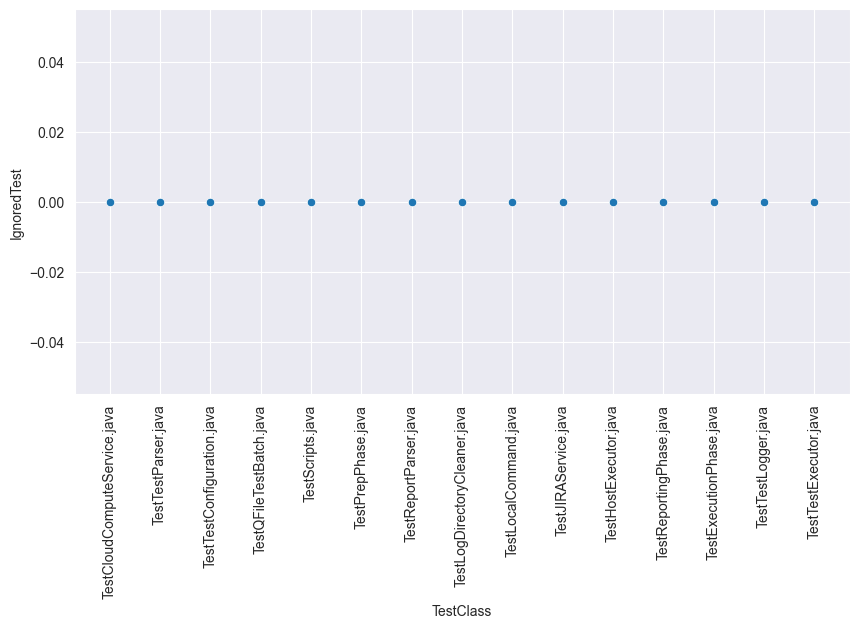

/var/folders/1w/yzvnkzw94wgdv0083vhb0dq00000gn/T/ipykernel_2104/1890560810.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(),rotation=90)


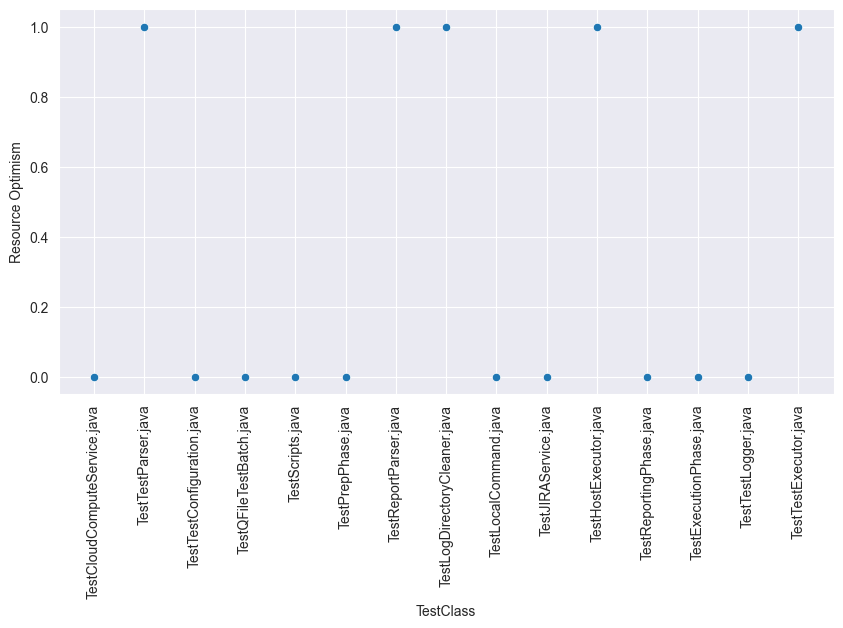

/var/folders/1w/yzvnkzw94wgdv0083vhb0dq00000gn/T/ipykernel_2104/1890560810.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(),rotation=90)


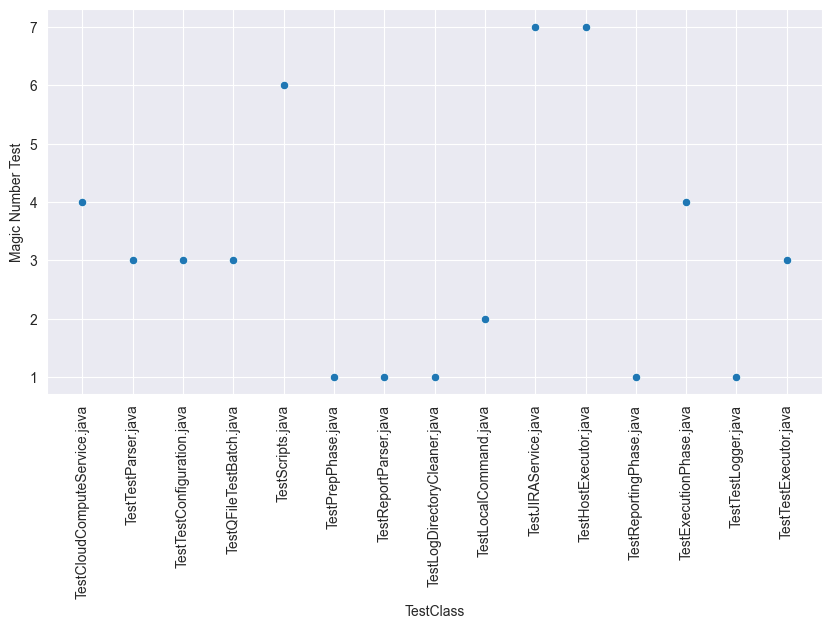

/var/folders/1w/yzvnkzw94wgdv0083vhb0dq00000gn/T/ipykernel_2104/1890560810.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(),rotation=90)


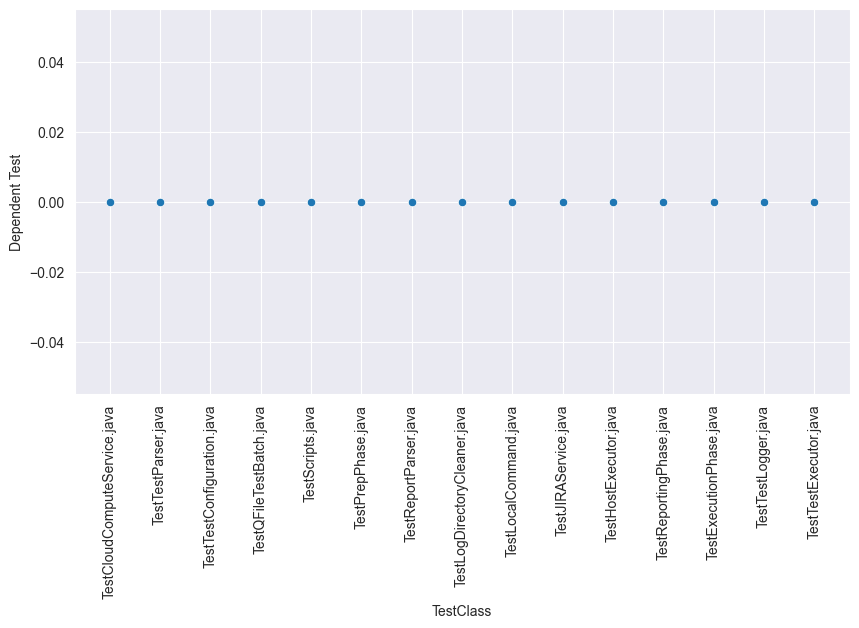

In [994]:
for i in enumerate(feature):
    test_smell_show_inEachClass(i[1])

KeyError: "['Test_Smell'] not in index"

<Figure size 1000x700 with 0 Axes>

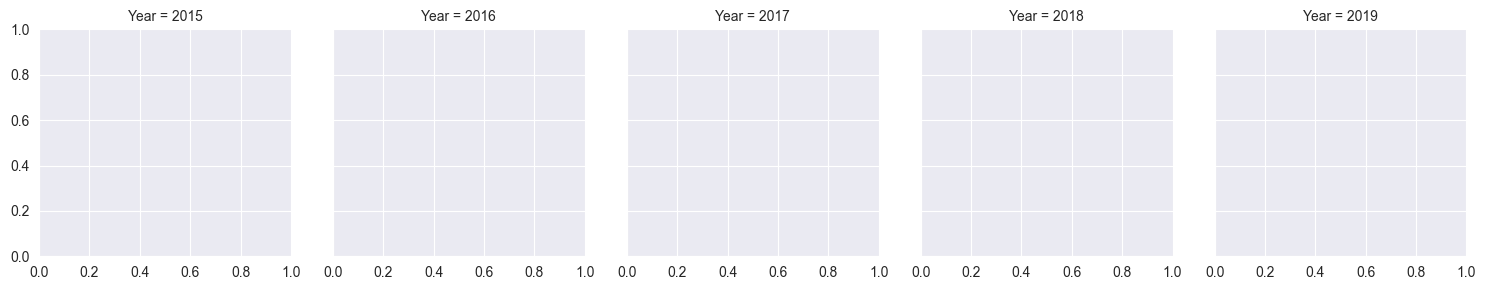

In [995]:
plt.figure(figsize=(10, 7))
g = sns.FacetGrid(all_list_hive_total, col="Year")
g.map(sns.scatterplot, 'Test_Smell', 'Amount')
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

In [ ]:
plt.figure(figsize= (15,30))
for i in enumerate(feature):
    sns.relplot(data=all_list_hive_total, x='Year', y=i[1])